<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB


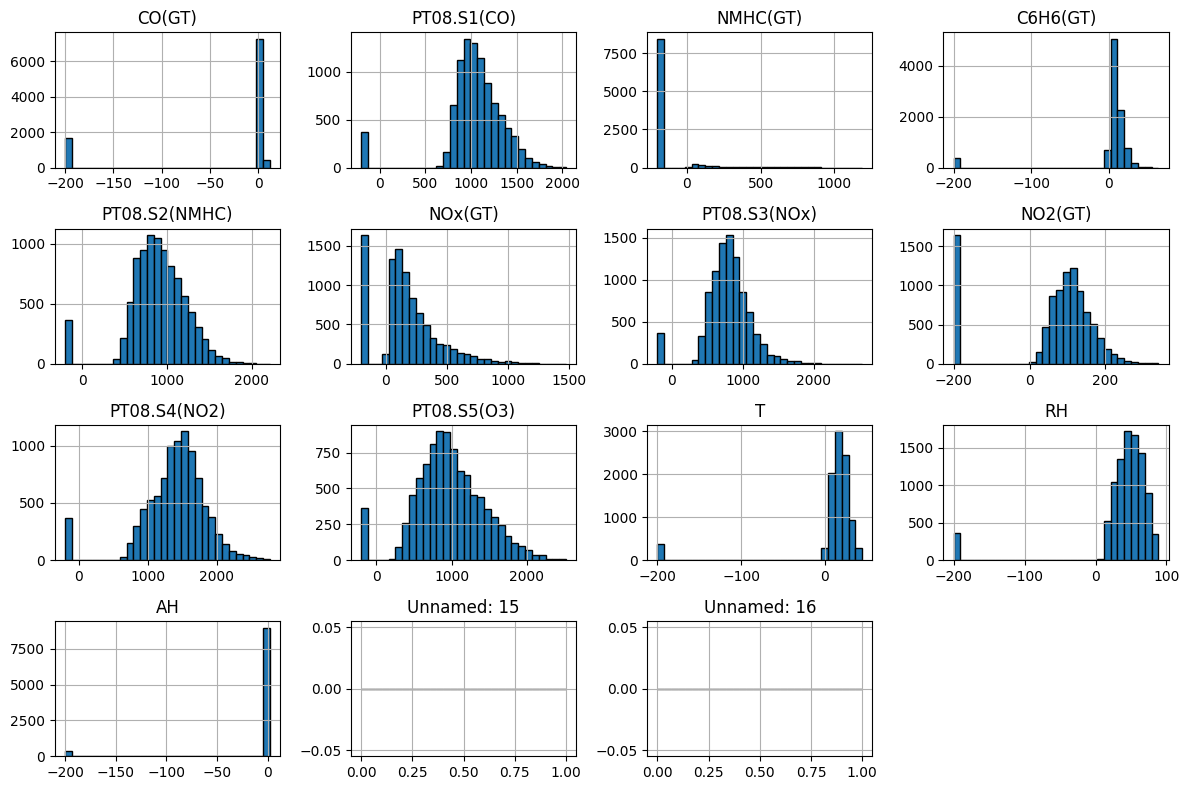

(         Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
 0  10/03/2004  18.00.00     2.6       1360.0     150.0      11.9   
 1  10/03/2004  19.00.00     2.0       1292.0     112.0       9.4   
 2  10/03/2004  20.00.00     2.2       1402.0      88.0       9.0   
 3  10/03/2004  21.00.00     2.2       1376.0      80.0       9.2   
 4  10/03/2004  22.00.00     1.6       1272.0      51.0       6.5   
 
    PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
 0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
 1          955.0    103.0        1174.0     92.0        1559.0        972.0   
 2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
 3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
 4          836.0    131.0        1205.0    116.0        1490.0       1110.0   
 
       T    RH      AH  Unnamed: 15  Unnamed: 16  
 0  13.6  48.9  0.7578          NaN          NaN  


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Define file path
file_path = 'Documents/air+quality/AirQualityUCI.csv'

# Read the dataset with appropriate settings
data = pd.read_csv(file_path, delimiter=';', decimal=',', low_memory=False)

# Display dataset overview
preview = data.head()
info = data.info()
description = data.describe(include='all')

# Plot histogram for numerical columns
data.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

# Output results
preview, info, description

In [17]:
# Drop completely empty columns
data_cleaned = data.drop(columns=["Unnamed: 15", "Unnamed: 16"])

# Replace missing values encoded as -200 with NaN
data_cleaned.replace(-200, np.nan, inplace=True)

# Drop the NMHC(GT) variable
data_cleaned.drop(columns=["NMHC(GT)"], inplace=True)

# Combine 'Date' and 'Time' into a single 'Datetime' column
data_cleaned["Datetime"] = pd.to_datetime(data_cleaned["Date"] + " " + data_cleaned["Time"], format="%d/%m/%Y %H.%M.%S", errors="coerce")

# Drop the original 'Date' and 'Time' columns
data_cleaned.drop(columns=["Date", "Time"], inplace=True)

# Print the first few rows of the cleaned data
print("First few rows of the cleaned data:")
print(data_cleaned.head())

# Export the cleaned dataset as a CSV file
output_file = 'cleaned_air_quality_data.csv'
data_cleaned.to_csv(output_file, index=False, encoding='utf-8')

print(f"Cleaned dataset has been exported as '{output_file}'")

First few rows of the cleaned data:
   CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  \
0     2.6       1360.0      11.9         1046.0    166.0        1056.0   
1     2.0       1292.0       9.4          955.0    103.0        1174.0   
2     2.2       1402.0       9.0          939.0    131.0        1140.0   
3     2.2       1376.0       9.2          948.0    172.0        1092.0   
4     1.6       1272.0       6.5          836.0    131.0        1205.0   

   NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH            Datetime  
0    113.0        1692.0       1268.0  13.6  48.9  0.7578 2004-03-10 18:00:00  
1     92.0        1559.0        972.0  13.3  47.7  0.7255 2004-03-10 19:00:00  
2    114.0        1555.0       1074.0  11.9  54.0  0.7502 2004-03-10 20:00:00  
3    122.0        1584.0       1203.0  11.0  60.0  0.7867 2004-03-10 21:00:00  
4    116.0        1490.0       1110.0  11.2  59.6  0.7888 2004-03-10 22:00:00  
Cleaned dataset has been exported as 'c

In [15]:

# Drop completely empty columns
data_cleaned = data.drop(columns=["Unnamed: 15", "Unnamed: 16"])

# Replace missing values encoded as -200 with NaN
data_cleaned.replace(-200, np.nan, inplace=True)

# Drop the NMHC(GT) variable
data_cleaned.drop(columns=["NMHC(GT)"], inplace=True)

# Combine 'Date' and 'Time' into a single 'Datetime' column
data_cleaned["Datetime"] = pd.to_datetime(data_cleaned["Date"] + " " + data_cleaned["Time"], format="%d/%m/%Y %H.%M.%S", errors="coerce")

# Drop the original 'Date' and 'Time' columns
data_cleaned.drop(columns=["Date", "Time"], inplace=True)

# Print the first few rows of the cleaned data
print("First few rows of the cleaned data:")
print(data_cleaned.head())

# Export the cleaned dataset as an Excel file
output_file = 'cleaned_air_quality_data.xlsx'
with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
    data_cleaned.to_excel(writer, index=False, sheet_name='Cleaned Data')

print(f"Cleaned dataset has been exported as '{output_file}'")

First few rows of the cleaned data:
   CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  \
0     2.6       1360.0      11.9         1046.0    166.0        1056.0   
1     2.0       1292.0       9.4          955.0    103.0        1174.0   
2     2.2       1402.0       9.0          939.0    131.0        1140.0   
3     2.2       1376.0       9.2          948.0    172.0        1092.0   
4     1.6       1272.0       6.5          836.0    131.0        1205.0   

   NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH            Datetime  
0    113.0        1692.0       1268.0  13.6  48.9  0.7578 2004-03-10 18:00:00  
1     92.0        1559.0        972.0  13.3  47.7  0.7255 2004-03-10 19:00:00  
2    114.0        1555.0       1074.0  11.9  54.0  0.7502 2004-03-10 20:00:00  
3    122.0        1584.0       1203.0  11.0  60.0  0.7867 2004-03-10 21:00:00  
4    116.0        1490.0       1110.0  11.2  59.6  0.7888 2004-03-10 22:00:00  
Cleaned dataset has been exported as 'c

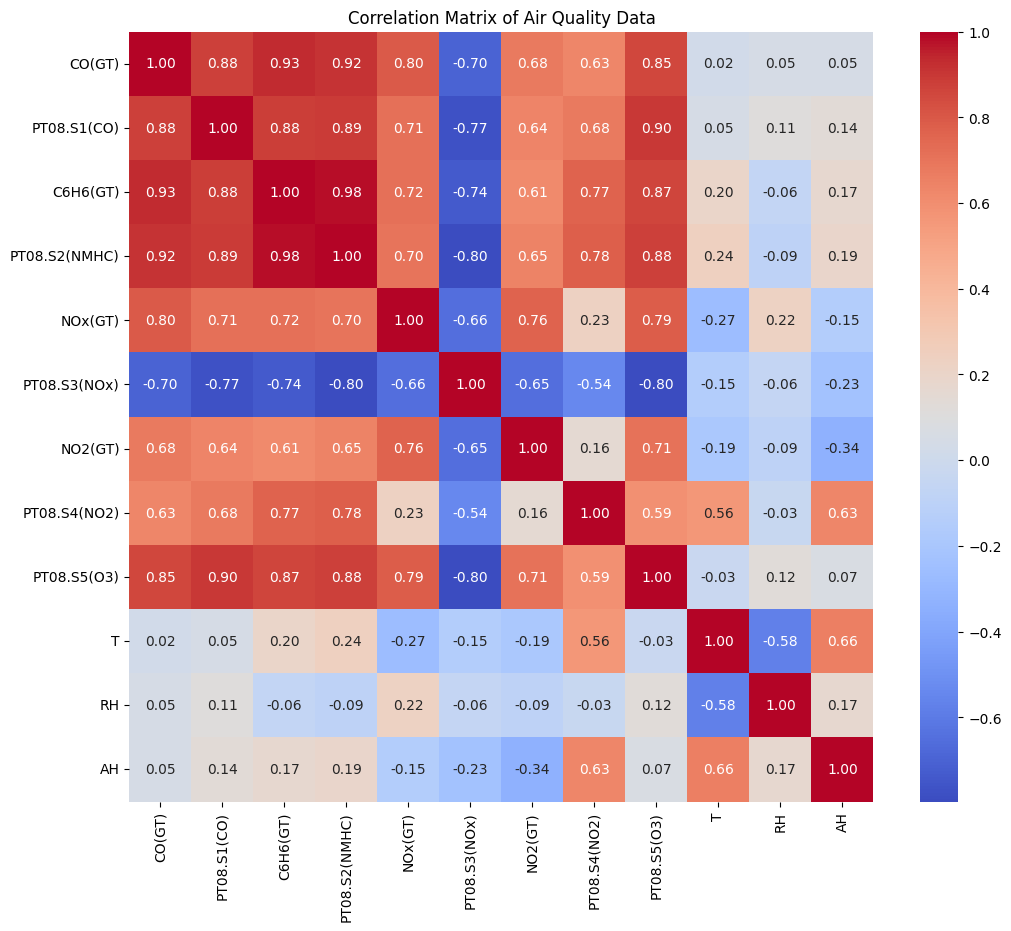

In [11]:
# Part 2: Data Analysis and Visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
cleaned_data = pd.read_excel('cleaned_air_quality_data.xlsx')

# Select only numerical columns for correlation calculation
numerical_data = cleaned_data.select_dtypes(include=['number'])

# Calculate the correlation matrix using only numerical columns
correlation_matrix = numerical_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Air Quality Data')
plt.show()

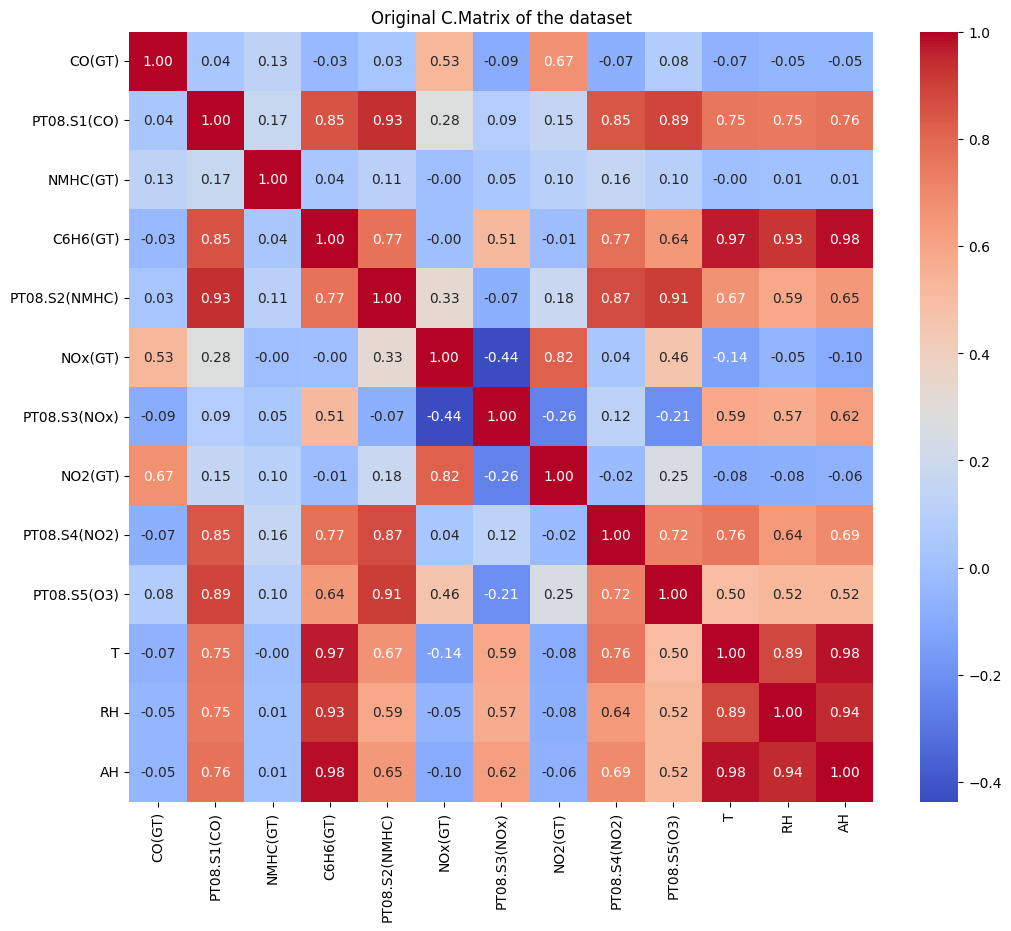

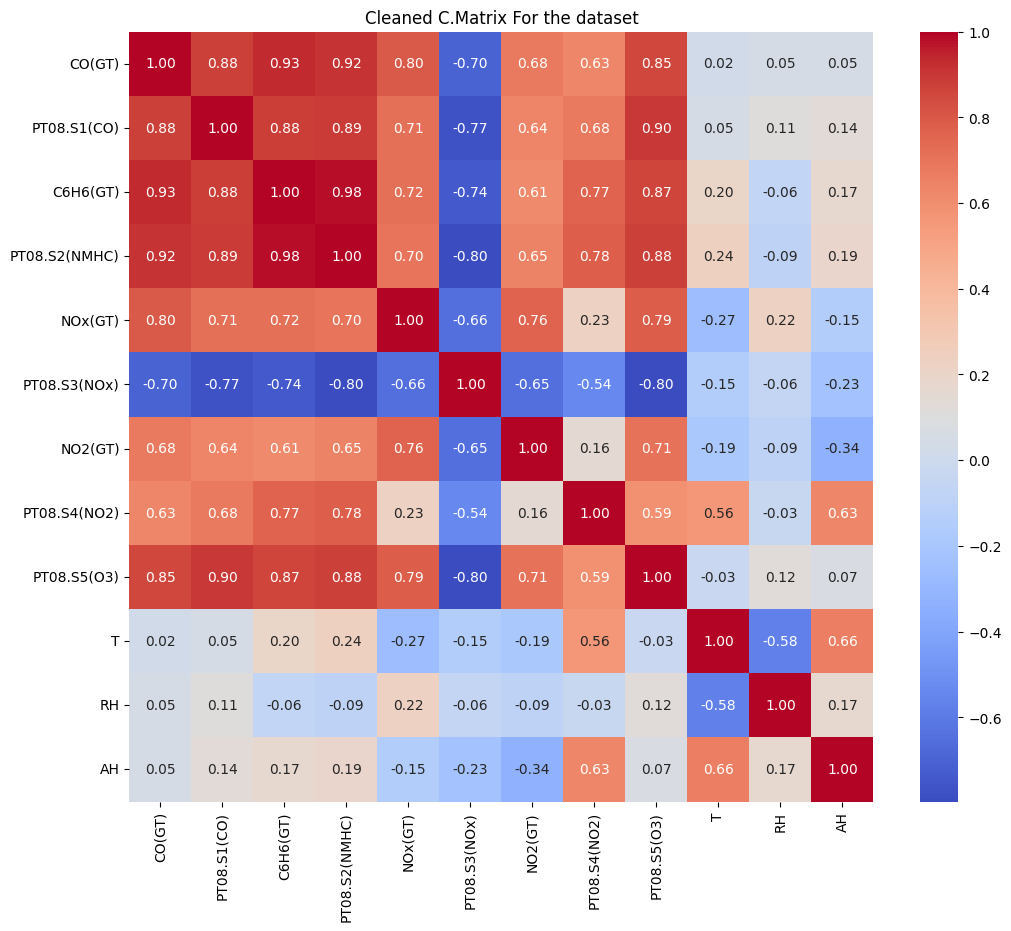

Cleaned dataset has been exported as 'cleaned_air_quality_data.csv'


In [29]:
# Drop completely empty columns
data_cleaned = data.drop(columns=["Unnamed: 15", "Unnamed: 16"])

# Step 1: Calculate and plot correlation matrix BEFORE cleaning
# Select only numerical columns for correlation calculation
numerical_data_before = data_cleaned.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix_before = numerical_data_before.corr()

# Plot the correlation matrix BEFORE cleaning
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_before, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Original C.Matrix of the dataset')
plt.show()

# Step 2: Clean the dataset
# Replace missing values encoded as -200 with NaN
data_cleaned.replace(-200, np.nan, inplace=True)

# Drop the NMHC(GT) variable
data_cleaned.drop(columns=["NMHC(GT)"], inplace=True)

# Combine 'Date' and 'Time' into a single 'Datetime' column
data_cleaned["Datetime"] = pd.to_datetime(data_cleaned["Date"] + " " + data_cleaned["Time"], format="%d/%m/%Y %H.%M.%S", errors="coerce")

# Drop the original 'Date' and 'Time' columns
data_cleaned.drop(columns=["Date", "Time"], inplace=True)

# Step 3: Calculate and plot correlation matrix AFTER cleaning
# Select only numerical columns for correlation calculation
numerical_data_after = data_cleaned.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix_after = numerical_data_after.corr()

# Plot the correlation matrix AFTER cleaning
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_after, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Cleaned C.Matrix For the dataset')
plt.show()

# Step 4: Export the cleaned dataset to a CSV file
data_cleaned.to_csv('cleaned_air_quality_data.csv', index=False)
print("Cleaned dataset has been exported as 'cleaned_air_quality_data.csv'")

Overall :
            CO(GT)  PT08.S1(CO)     C6H6(GT)  PT08.S2(NMHC)      NOx(GT)  \
count  9471.000000  9471.000000  9471.000000    9471.000000  9471.000000   
mean      2.087911  1100.427960    10.144047     941.521259   234.124066   
min       0.100000   647.000000     0.100000     383.000000     2.000000   
25%       1.020000   941.000000     4.540000     740.000000    91.000000   
50%       1.800000  1070.000000     8.400000     917.000000   170.800000   
75%       2.700000  1226.000000    13.900000    1113.000000   304.000000   
max      11.900000  2040.000000    63.700000    2214.000000  1479.000000   
std       1.408977   213.367523     7.379831     264.096007   204.425622   

       PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)            T  \
count   9471.000000  9471.000000   9471.000000  9471.000000  9471.000000   
mean     833.027175   108.957832   1457.415581  1026.005595    18.375108   
min      322.000000     2.000000    551.000000   221.000000    -1.900000   
2

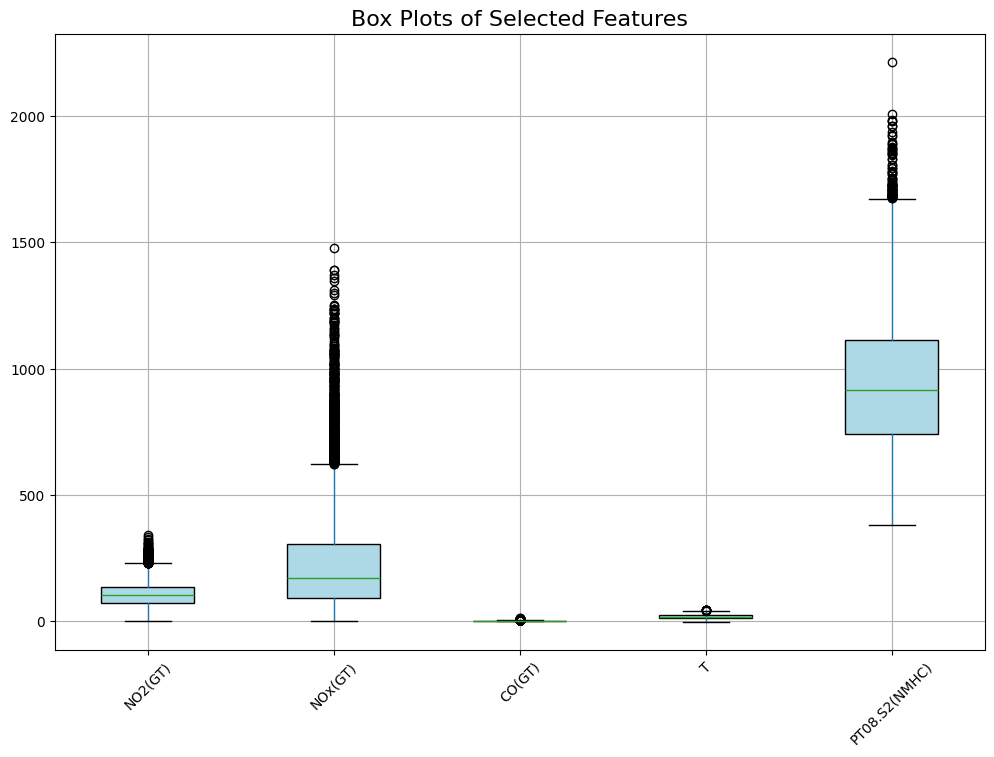

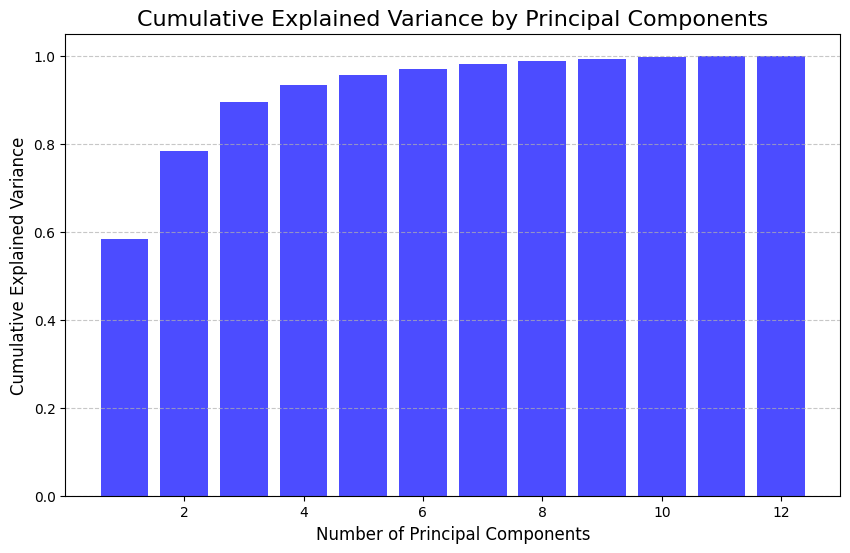


Explained Variance by Principal Components:
Principal Component 1: 0.5834 (0.5834 cumulative)
Principal Component 2: 0.1998 (0.7832 cumulative)
Principal Component 3: 0.1124 (0.8956 cumulative)
Principal Component 4: 0.0379 (0.9335 cumulative)
Principal Component 5: 0.0227 (0.9562 cumulative)
Principal Component 6: 0.0137 (0.9699 cumulative)
Principal Component 7: 0.0102 (0.9801 cumulative)
Principal Component 8: 0.0081 (0.9881 cumulative)
Principal Component 9: 0.0053 (0.9934 cumulative)
Principal Component 10: 0.0031 (0.9965 cumulative)


In [44]:
# Drop completely empty columns
data_cleaned = data.drop(columns=["Unnamed: 15", "Unnamed: 16"])

# Replace missing values encoded as -200 with NaN
data_cleaned.replace(-200, np.nan, inplace=True)

# Drop the NMHC(GT) variable
data_cleaned.drop(columns=["NMHC(GT)"], inplace=True)

# Perform KNN Imputation
imputer = KNNImputer(n_neighbors=5)
imputed_numerical_data = pd.DataFrame(imputer.fit_transform(data_cleaned.select_dtypes(include=['number'])), 
                                     columns=data_cleaned.select_dtypes(include=['number']).columns)

# Combine 'Date' and 'Time' into a single 'Datetime' column
data_cleaned["Datetime"] = pd.to_datetime(data_cleaned["Date"] + " " + data_cleaned["Time"], format="%d/%m/%Y %H.%M.%S", errors="coerce")

# Drop the original 'Date' and 'Time' columns
data_cleaned.drop(columns=["Date", "Time"], inplace=True)

# Merge the imputed numerical data back with the non-numerical data
data_cleaned.update(imputed_numerical_data)

# Step 1: Summary statistics
print("Overall :")
print(data_cleaned.describe())

# Step 2: Box plots for selected features
features_to_plot = ['NO2(GT)', 'NOx(GT)', 'CO(GT)', 'T', 'PT08.S2(NMHC)']
plt.figure(figsize=(12, 8))
data_cleaned[features_to_plot].boxplot(patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title("Box Plots of Selected Features", fontsize=16)
plt.xticks(rotation=45)
plt.show()

# Step 3: Correlation matrix
numerical_data = data_cleaned.select_dtypes(include=['number'])
correlation_matrix = numerical_data.corr()

# Step 4: PCA Analysis
# Standardize the numerical data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Perform PCA
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot cumulative explained variance as a bar graph
plt.figure(figsize=(10, 6))
plt.bar(
    range(1, len(cumulative_variance) + 1),  # X-axis: Number of principal components
    cumulative_variance,  # Y-axis: Cumulative explained variance
    color='blue',  # Bar color
    alpha=0.7  # Transparency of bars
)

# Add labels and title
plt.title("Cumulative Explained Variance by Principal Components", fontsize=16)
plt.xlabel("Number of Principal Components", fontsize=12)
plt.ylabel("Cumulative Explained Variance", fontsize=12)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

# Print explained variance for the first few components
print("\nExplained Variance by Principal Components:")
for i, var in enumerate(explained_variance_ratio[:10], start=1):
    print(f"Principal Component {i}: {var:.4f} ({cumulative_variance[i-1]:.4f} cumulative)")

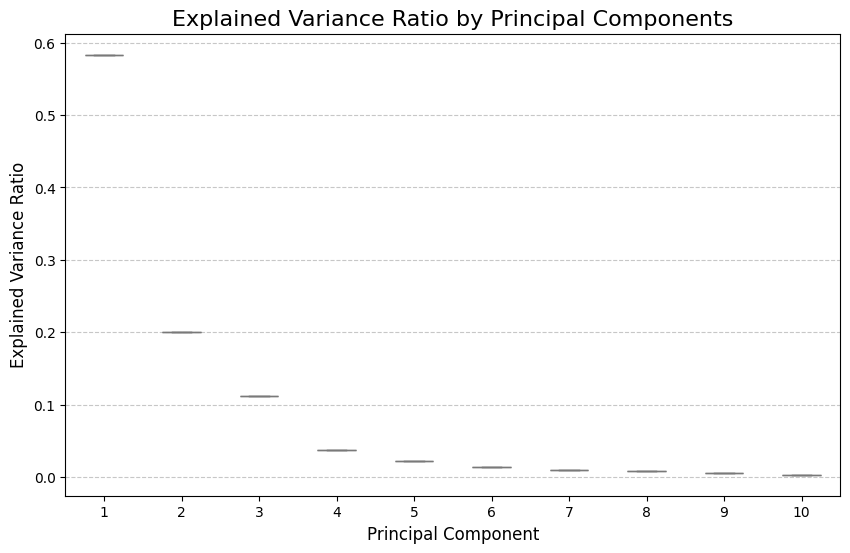

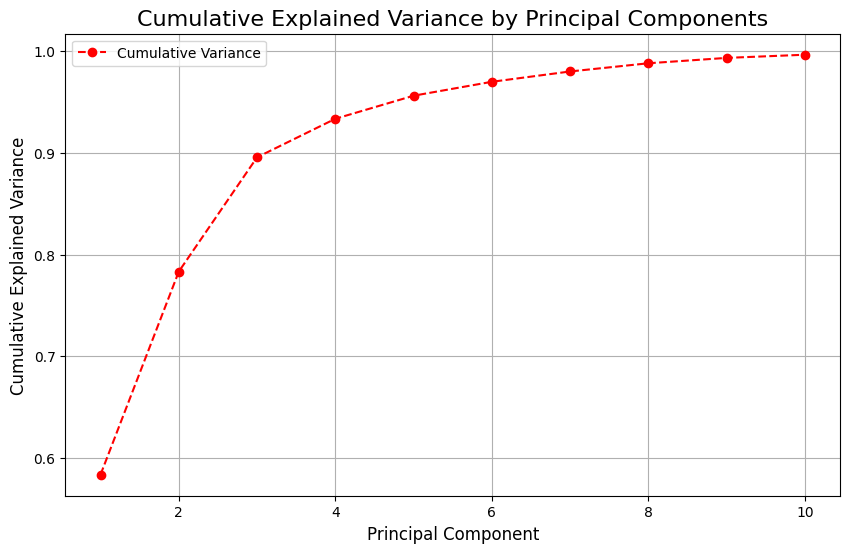

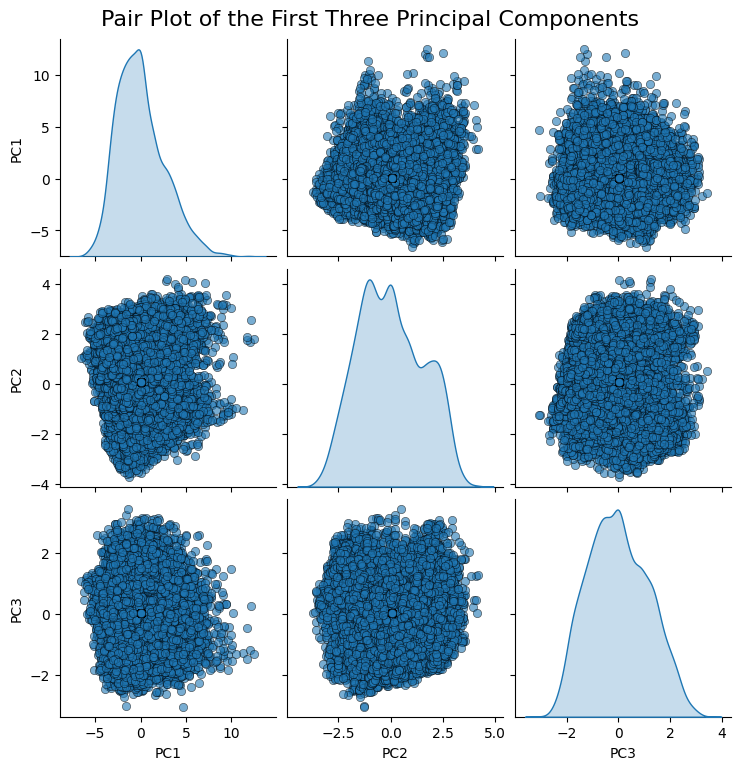

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure for variance visualization using a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(
    x=list(range(1, 11)),  # X-axis: Principal Components
    y=explained_variance_ratio[:10],  # Y-axis: Explained Variance Ratio
    color='lightblue',  # Box plot color
    width=0.5  # Width of the boxes
)
plt.title('Explained Variance Ratio by Principal Components', fontsize=16)
plt.xlabel('Principal Component', fontsize=12)
plt.ylabel('Explained Variance Ratio', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot cumulative variance as a line plot (unchanged)
plt.figure(figsize=(10, 6))
plt.plot(
    range(1, 11), 
    cumulative_variance[:10], 
    marker='o', 
    linestyle='--', 
    color='red', 
    label='Cumulative Variance'
)
plt.title('Cumulative Explained Variance by Principal Components', fontsize=16)
plt.xlabel('Principal Component', fontsize=12)
plt.ylabel('Cumulative Explained Variance', fontsize=12)
plt.legend(loc='best')
plt.grid()
plt.show()

# Pair plot of the first three principal components
pca_df = pd.DataFrame(pca_data[:, :3], columns=['PC1', 'PC2', 'PC3'])
sns.pairplot(pca_df, diag_kind='kde', plot_kws={'alpha': 0.6, 'edgecolor': 'k'})
plt.suptitle('Pair Plot of the First Three Principal Components', y=1.02, fontsize=16)
plt.show()

C:\Users\Krishna\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1.4189 - mean_absolute_error: 0.7825 - val_loss: 0.2099 - val_mean_absolute_error: 0.3088
Epoch 2/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1388 - mean_absolute_error: 0.2631 - val_loss: 0.1288 - val_mean_absolute_error: 0.2212
Epoch 3/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0938 - mean_absolute_error: 0.2061 - val_loss: 0.1226 - val_mean_absolute_error: 0.2210
Epoch 4/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0894 - mean_absolute_error: 0.2044 - val_loss: 0.1210 - val_mean_absolute_error: 0.2173
Epoch 5/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0871 - mean_absolute_error: 0.1982 - val_loss: 0.1138 - val_mean_absolute_error: 0.2097
Epoch 6/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0872 - mean_absolute_error: 0.1990 - val_loss: 0.1165 - val_mean_absolute_error: 0.2103
Epoch 7/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0861 - mean_absolute_error: 0.1

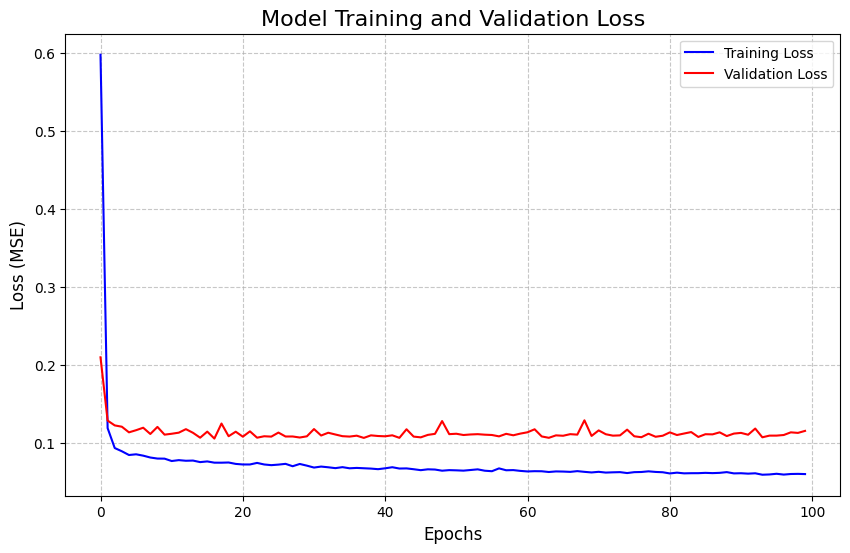

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# Use the first 5 principal components as input features
input_features = pca_data[:, :5]

# Select the target variable (CO(GT))
target_variable = numerical_data[['CO(GT)']]

# Split the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(input_features, target_variable, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define the neural network architecture
neural_network = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # First hidden layer
    Dense(32, activation='relu'),  # Second hidden layer
    Dense(y_train.shape[1], activation='linear')  # Output layer
])

# Compile the model
neural_network.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Train the model
training_history = neural_network.fit(
    X_train, y_train, 
    epochs=100, 
    batch_size=32, 
    validation_data=(X_val, y_val), 
    verbose=1
)

# Make predictions on the test set
predictions = neural_network.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, predictions, multioutput='raw_values')
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions, multioutput='raw_values')

# Display evaluation metrics for each target variable
for idx, target in enumerate(target_variable.columns):
    print(
        f"Target: {target} - "
        f"MSE: {mse[idx]:.4f}, "
        f"RMSE: {rmse[idx]:.4f}, "
        f"MAE: {mae[idx]:.4f}"
    )

# Visualize the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(training_history.history['loss'], label='Training Loss', color='blue')
plt.plot(training_history.history['val_loss'], label='Validation Loss', color='red')
plt.title('Model Training and Validation Loss', fontsize=16)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss (MSE)', fontsize=12)
plt.legend()
plt.grid(linestyle='--', alpha=0.7)
plt.show()

Testing parameters: {'neurons': 32, 'activation': 'elu', 'learning_rate': 0.001, 'batch_size': 16, 'epochs': 25}
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Testing parameters: {'neurons': 128, 'activation': 'relu', 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 25}
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Testing parameters: {'neurons': 32, 'activation': 'elu', 'learning_rate': 0.001, 'batch_size': 16, 'epochs': 25}
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Testing parameters: {'neurons': 64, 'activation': 'elu', 'learning_rate': 0.01, 'batch_size': 32, 'epochs': 25}
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Testing parameters: {'neurons': 32, 'activation': 'elu', 'learning_rate': 0.01, 'batch_size': 32, 'epochs': 25}
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Testing parameters: {'neurons': 64, 'activation': 'relu', 'learning_rate': 0.01, 'batch_size': 32, 'epochs': 25}
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Testing parameters: {'neurons': 128, 'activation': 'elu', 'learning_rate': 0.001, 'batch

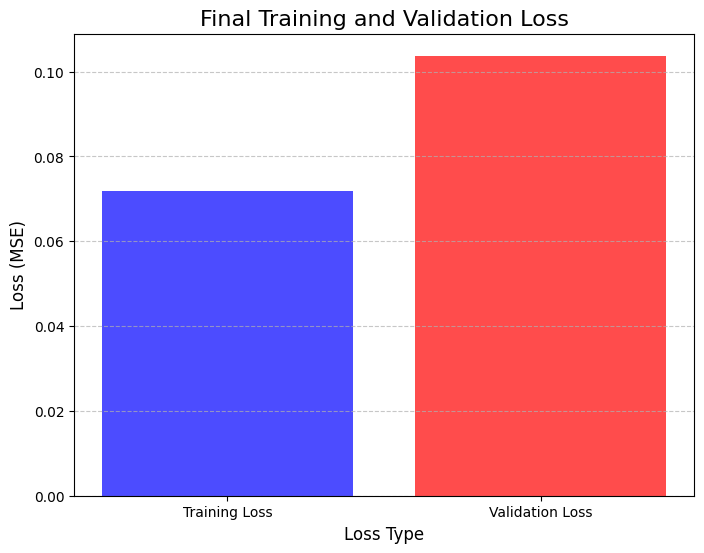

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import random

# Use the first 5 principal components as input features
input_features = pca_data[:, :5]

# Select the target variable (CO(GT))
target_variable = numerical_data[['CO(GT)']]

# Split the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(input_features, target_variable, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Function to build and compile the ANN model
def create_model(input_dim, neurons, activation, learning_rate):
    model = Sequential([
        Input(shape=(input_dim,)),  # Input layer
        Dense(neurons, activation=activation),  # First hidden layer
        Dense(neurons, activation=activation),  # Second hidden layer
        Dense(1, activation='linear')  # Output layer for regression
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])
    return model

# Define the hyperparameter search space
hyperparameter_space = {
    'neurons': [32, 64, 128],  # Neurons in each layer
    'activation': ['relu', 'elu'],  # Activation functions
    'learning_rate': [0.001, 0.01],  # Learning rates
    'batch_size': [16, 32],  # Batch sizes
    'epochs': [25]  # Fixed number of epochs
}

# Random search implementation
best_model = None
best_rmse = float('inf')
best_mse = float('inf')
best_mae = float('inf')

for _ in range(10):  # Randomly test 10 combinations
    # Randomly select hyperparameters
    params = {key: random.choice(values) for key, values in hyperparameter_space.items()}
    print(f"Testing parameters: {params}")

    # Build the model with current parameters
    model = create_model(
        input_dim=X_train.shape[1],
        neurons=params['neurons'],
        activation=params['activation'],
        learning_rate=params['learning_rate']
    )

    # Train the model
    training_history = model.fit(
        X_train, y_train,
        epochs=params['epochs'],
        batch_size=params['batch_size'],
        validation_data=(X_val, y_val),
        verbose=0
    )

    # Evaluate the model on the validation set
    y_pred_val = model.predict(X_val)
    val_mse = mean_squared_error(y_val, y_pred_val)
    val_rmse = np.sqrt(val_mse)
    val_mae = mean_absolute_error(y_val, y_pred_val)

    # Update the best model if RMSE improves
    if val_rmse < best_rmse:
        best_rmse = val_rmse
        best_mse = val_mse
        best_mae = val_mae
        best_model = model
        best_params = params

# Print best validation metrics
print(f"Best Parameters: {best_params}")
print(f"Best Validation MSE: {best_mse:.4f}")
print(f"Best Validation RMSE: {best_rmse:.4f}")
print(f"Best Validation MAE: {best_mae:.4f}")

# Evaluate the best model on the test set
y_pred_test = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred_test)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_pred_test)

# Print test metrics explicitly
print("\nFinal Test Set Metrics:")
print(f"Test MSE: {test_mse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Test MAE: {test_mae:.4f}")

# Extract the final training and validation loss
final_train_loss = training_history.history['loss'][-1]
final_val_loss = training_history.history['val_loss'][-1]

# Visualize the final training and validation loss using a bar graph
plt.figure(figsize=(8, 6))
plt.bar(
    ['Training Loss', 'Validation Loss'],  # X-axis labels
    [final_train_loss, final_val_loss],  # Y-axis values
    color=['blue', 'red'],  # Bar colors
    alpha=0.7  # Transparency
)
plt.title('Final Training and Validation Loss', fontsize=16)
plt.xlabel('Loss Type', fontsize=12)
plt.ylabel('Loss (MSE)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Epoch 1/100


C:\Users\Krishna\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


237/237 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.1140 - mean_absolute_error: 0.7112 - val_loss: 0.1733 - val_mean_absolute_error: 0.2767
Epoch 2/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1120 - mean_absolute_error: 0.2335 - val_loss: 0.1417 - val_mean_absolute_error: 0.2516
Epoch 3/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0980 - mean_absolute_error: 0.2133 - val_loss: 0.1272 - val_mean_absolute_error: 0.2195
Epoch 4/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0910 - mean_absolute_error: 0.2022 - val_loss: 0.1242 - val_mean_absolute_error: 0.2164
Epoch 5/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0899 - mean_absolute_error: 0.1995 - val_loss: 0.1159 - val_mean_absolute_error: 0.2110
Epoch 6/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0911 - mean_absolute_error: 0.2025 - val_loss: 0.1258 - val_mean_absolute_error: 0.2234
Epoch 7/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0858 - mean_absolute_error: 0.1966 - val_lo

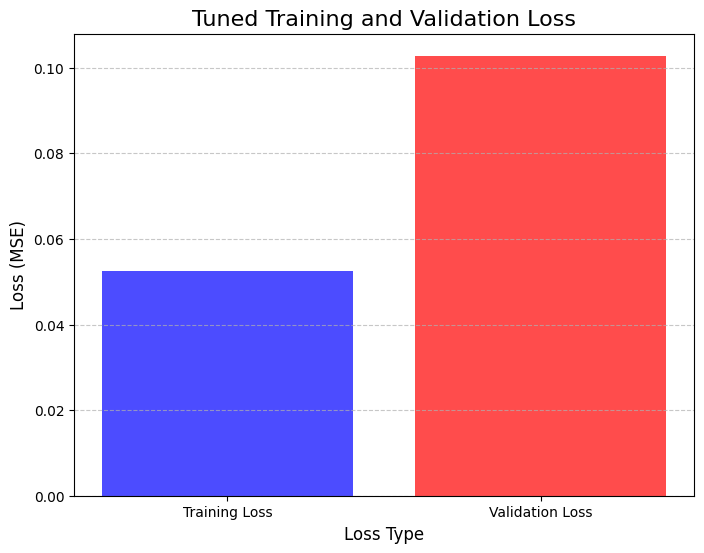

In [57]:
# Use the first 5 principal components as input features
input_features = pca_data[:, :5]

# Select the target variable (CO(GT))
target_variable = numerical_data[['CO(GT)']]

# Split the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(input_features, target_variable, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Build the neural network model
neural_network = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # First hidden layer
    Dense(64, activation='relu'),  # Second hidden layer
    Dense(y_train.shape[1], activation='linear')  # Output layer for regression
])

# Compile the model
optimizer = Adam(learning_rate=0.001)
neural_network.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])

# Train the model
training_history = neural_network.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=1
)

# Evaluate the model on the test set
predictions = neural_network.predict(X_test)

# Calculate evaluation metrics
test_mse = mean_squared_error(y_test, predictions, multioutput='raw_values')
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, predictions, multioutput='raw_values')

# Print evaluation metrics for each target variable
for idx, target in enumerate(target_variable.columns):
    print(
        f"{target} - "
        f"Test MSE: {test_mse[idx]:.4f}, "
        f"Test RMSE: {test_rmse[idx]:.4f}, "
        f"Test MAE: {test_mae[idx]:.4f}"
    )

# Extract the final training and validation loss
final_train_loss = training_history.history['loss'][-1]
final_val_loss = training_history.history['val_loss'][-1]

# Plot training and validation loss as a bar graph
plt.figure(figsize=(8, 6))
plt.bar(
    ['Training Loss', 'Validation Loss'],  # X-axis labels
    [final_train_loss, final_val_loss],  # Y-axis values
    color=['blue', 'red'],  # Bar colors
    alpha=0.7  # Transparency
)
plt.title('Tuned Training and Validation Loss', fontsize=16)
plt.xlabel('Loss Type', fontsize=12)
plt.ylabel('Loss (MSE)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Epoch 1/100


C:\Users\Krishna\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


237/237 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.0839 - mean_absolute_error: 0.9828 - val_loss: 0.2236 - val_mean_absolute_error: 0.3299
Epoch 2/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1559 - mean_absolute_error: 0.2863 - val_loss: 0.1423 - val_mean_absolute_error: 0.2438
Epoch 3/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1115 - mean_absolute_error: 0.2263 - val_loss: 0.1281 - val_mean_absolute_error: 0.2301
Epoch 4/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0960 - mean_absolute_error: 0.2100 - val_loss: 0.1247 - val_mean_absolute_error: 0.2258
Epoch 5/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0962 - mean_absolute_error: 0.2109 - val_loss: 0.1191 - val_mean_absolute_error: 0.2191
Epoch 6/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0854 - mean_absolute_error: 0.2008 - val_loss: 0.1179 - val_mean_absolute_error: 0.2165
Epoch 7/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0879 - mean_absolute_error: 0.2010 - val_lo

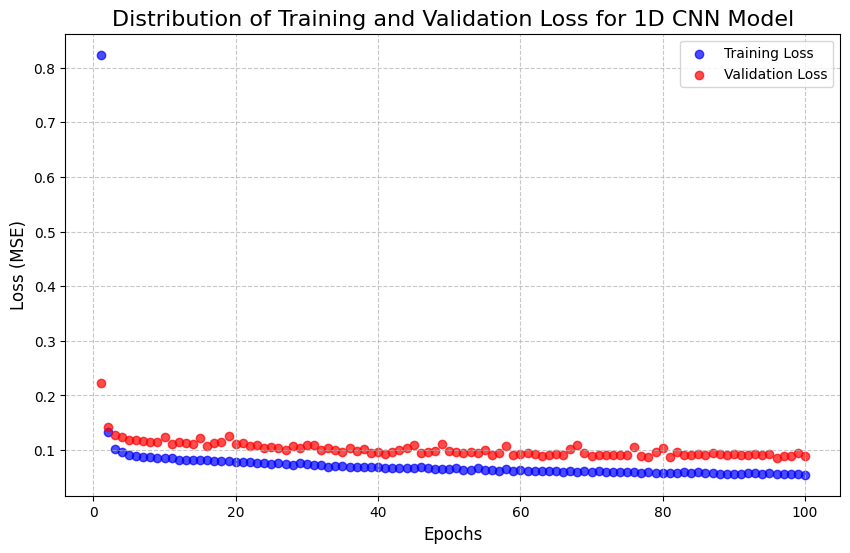

In [71]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
import matplotlib.pyplot as plt

# Use the first 6 principal components as input features
input_features = pca_data[:, :6]

# Select the target variable (CO(GT))
target_variable = numerical_data[['CO(GT)']]

# Split the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(input_features, target_variable, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Reshape data to fit 1D CNN input requirements (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build the 1D CNN model
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),  # 1D Convolutional layer
    MaxPooling1D(pool_size=2),  # Max pooling layer
    Flatten(),  # Flatten the output for the dense layer
    Dense(50, activation='relu'),  # Fully connected layer
    Dense(1)  # Output layer for regression
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Train the model
training_history = cnn_model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=1
)

# Evaluate the model on the test set
predictions = cnn_model.predict(X_test)

# Calculate evaluation metrics
test_mse = mean_squared_error(y_test, predictions)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, predictions)

# Print evaluation metrics for the target variable
print(f"CO(GT) - Test MSE: {test_mse:.4f}, Test RMSE: {test_rmse:.4f}, Test MAE: {test_mae:.4f}")

# Prepare data for scatter plot with error bars
epochs = range(1, len(training_history.history['loss']) + 1)
train_loss = training_history.history['loss']
val_loss = training_history.history['val_loss']

# Calculate mean and standard deviation for training and validation loss
train_loss_mean = np.mean(train_loss)
train_loss_std = np.std(train_loss)
val_loss_mean = np.mean(val_loss)
val_loss_std = np.std(val_loss)

# Plot training and validation loss as a scatter plot with error bars
plt.figure(figsize=(10, 6))
plt.scatter(epochs, train_loss, color='blue', label='Training Loss', alpha=0.7)
plt.scatter(epochs, val_loss, color='red', label='Validation Loss', alpha=0.7)
plt.title('Distribution of Training and Validation Loss for 1D CNN Model', fontsize=16)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss (MSE)', fontsize=12)
plt.legend()
plt.grid(linestyle='--', alpha=0.7)
plt.show()

Reloading Tuner from hyperparam_search\cnn_calibration\tuner0.json
Epoch 1/100


C:\Users\Krishna\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


237/237 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3671.5974 - mean_absolute_error: 41.6291 - val_loss: 421.9627 - val_mean_absolute_error: 15.2604
Epoch 2/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 432.7413 - mean_absolute_error: 15.7702 - val_loss: 548.0355 - val_mean_absolute_error: 17.8049
Epoch 3/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 449.8111 - mean_absolute_error: 16.0825 - val_loss: 461.3224 - val_mean_absolute_error: 16.0807
Epoch 4/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 455.1336 - mean_absolute_error: 16.1556 - val_loss: 403.7124 - val_mean_absolute_error: 14.9136
Epoch 5/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 429.7328 - mean_absolute_error: 15.5613 - val_loss: 271.4225 - val_mean_absolute_error: 12.6276
Epoch 6/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 299.2450 - mean_absolute_error: 13.3074 - val_loss: 258.1546 - val_mean_absolute_error: 12.2764
Epoch 7/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 248.6234

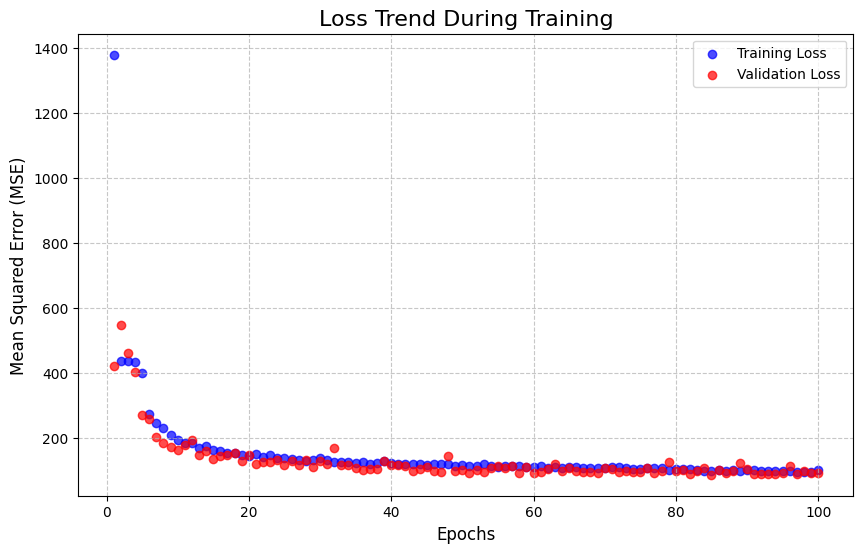

In [81]:
import keras_tuner as kt
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Utilize the first five principal components as input features
selected_features = pca_data[:, :5]

# Choose the target variable for prediction
target_output = numerical_data[['NO2(GT)']]

# Split data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(selected_features, target_output, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Reshape input data for compatibility with 1D CNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Function to construct and compile the CNN model
def create_cnn_model(hp):
    model = Sequential([
        Conv1D(
            filters=hp.Int('conv_filters', min_value=32, max_value=128, step=32),
            kernel_size=hp.Int('kernel_size', min_value=2, max_value=5),
            activation='relu',
            input_shape=(X_train.shape[1], 1)
        ),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(units=hp.Int('dense_units', min_value=32, max_value=128, step=32), activation='relu'),
        Dense(1)  # Output layer for regression
    ])
    
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[0.01, 0.001])),
        loss='mean_squared_error',
        metrics=['mean_absolute_error']
    )
    return model

# Configure the hyperparameter tuner
hyper_tuner = kt.RandomSearch(
    create_cnn_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=1,
    directory='hyperparam_search',
    project_name='cnn_calibration'
)

# Execute hyperparameter tuning
hyper_tuner.search(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

# Retrieve the optimal hyperparameters
optimal_hps = hyper_tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the CNN model using the best hyperparameters
final_model = create_cnn_model(optimal_hps)

# Train the model with the best hyperparameters
history = final_model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=1
)

# Generate predictions on the test set
y_pred = final_model.predict(X_test)

# Compute error metrics
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_pred)

# Display evaluation results
print(f"Test MSE: {mse_test:.4f}")
print(f"Test RMSE: {rmse_test:.4f}")
print(f"Test MAE: {mae_test:.4f}")

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.scatter(range(1, len(history.history['loss']) + 1), history.history['loss'], color='blue', label='Training Loss', alpha=0.7)
plt.scatter(range(1, len(history.history['val_loss']) + 1), history.history['val_loss'], color='red', label='Validation Loss', alpha=0.7)
plt.title('Loss Trend During Training', fontsize=16)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Mean Squared Error (MSE)', fontsize=12)
plt.legend()
plt.grid(linestyle='--', alpha=0.7)
plt.show()


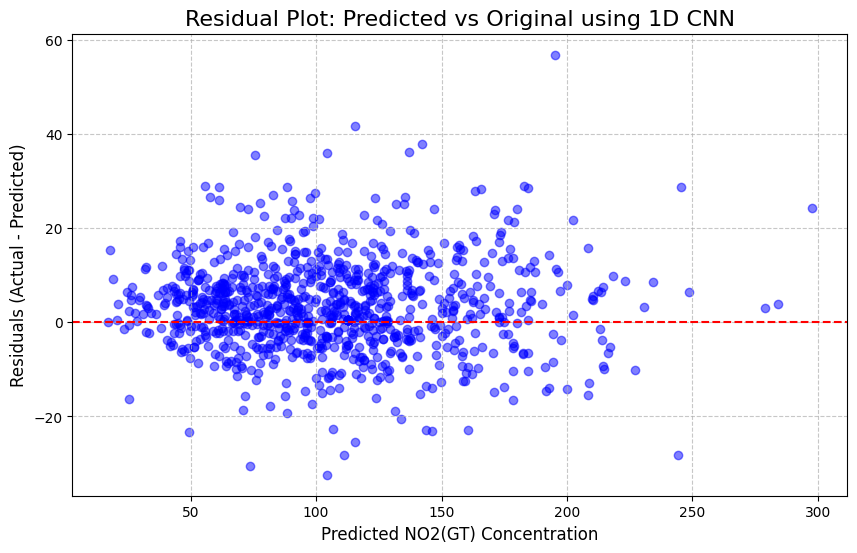

In [83]:
# Calculate residuals (difference between actual and predicted values)
residuals = y_test - y_pred

# Residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5, color='blue')
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at zero
plt.xlabel('Predicted NO2(GT) Concentration', fontsize=12)
plt.ylabel('Residuals (Actual - Predicted)', fontsize=12)
plt.title('Residual Plot: Predicted vs Original using 1D CNN', fontsize=16)
plt.grid(linestyle='--', alpha=0.7)
plt.show()

In [89]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

# Define input features (first 6 principal components) and target variables
X = pca_data[:, :6]
y = numerical_data[['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 
                    'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 
                    'PT08.S5(O3)', 'T', 'RH', 'AH']]

# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize models
svr_model = SVR(kernel='rbf', C=100, epsilon=0.1)
dt_model = DecisionTreeRegressor(max_depth=10, random_state=42)

# Train models for each output variable separately
svr_predictions = []
dt_predictions = []

for col in y.columns:
    svr_model.fit(X_train, y_train[col])
    dt_model.fit(X_train, y_train[col])

    svr_pred = svr_model.predict(X_test)
    dt_pred = dt_model.predict(X_test)

    svr_predictions.append(svr_pred)
    dt_predictions.append(dt_pred)

# Convert lists to NumPy arrays
svr_predictions = np.array(svr_predictions).T
dt_predictions = np.array(dt_predictions).T

# Evaluate models
svr_mse = mean_squared_error(y_test, svr_predictions, multioutput='raw_values')
svr_rmse = np.sqrt(svr_mse)
svr_mae = mean_absolute_error(y_test, svr_predictions, multioutput='raw_values')

dt_mse = mean_squared_error(y_test, dt_predictions, multioutput='raw_values')
dt_rmse = np.sqrt(dt_mse)
dt_mae = mean_absolute_error(y_test, dt_predictions, multioutput='raw_values')

# Display performance metrics
print("\nSupport Vector Regression (SVR) Performance:")
for i, target in enumerate(y.columns):
    print(f"{target} - MSE: {svr_mse[i]:.4f}, RMSE: {svr_rmse[i]:.4f}, MAE: {svr_mae[i]:.4f}")

print("\nDecision Tree Regression (DT) Performance:")
for i, target in enumerate(y.columns):
    print(f"{target} - MSE: {dt_mse[i]:.4f}, RMSE: {dt_rmse[i]:.4f}, MAE: {dt_mae[i]:.4f}")




Support Vector Regression (SVR) Performance:
CO(GT) - MSE: 0.0671, RMSE: 0.2590, MAE: 0.1619
PT08.S1(CO) - MSE: 1689.6018, RMSE: 41.1048, MAE: 30.5350
C6H6(GT) - MSE: 1.0605, RMSE: 1.0298, MAE: 0.5113
PT08.S2(NMHC) - MSE: 1044.2644, RMSE: 32.3151, MAE: 20.9319
NOx(GT) - MSE: 372.6794, RMSE: 19.3049, MAE: 11.5356
PT08.S3(NOx) - MSE: 565.1156, RMSE: 23.7722, MAE: 16.3424
NO2(GT) - MSE: 3.2260, RMSE: 1.7961, MAE: 1.2103
PT08.S4(NO2) - MSE: 1749.3877, RMSE: 41.8257, MAE: 27.6547
PT08.S5(O3) - MSE: 9200.2845, RMSE: 95.9181, MAE: 68.8996
T - MSE: 0.1599, RMSE: 0.3998, MAE: 0.2818
RH - MSE: 0.4923, RMSE: 0.7016, MAE: 0.4270
AH - MSE: 0.0018, RMSE: 0.0428, MAE: 0.0337

Decision Tree Regression (DT) Performance:
CO(GT) - MSE: 0.1535, RMSE: 0.3917, MAE: 0.2516
PT08.S1(CO) - MSE: 3237.5487, RMSE: 56.8995, MAE: 42.6238
C6H6(GT) - MSE: 1.7827, RMSE: 1.3352, MAE: 0.8051
PT08.S2(NMHC) - MSE: 1860.3488, RMSE: 43.1318, MAE: 30.2711
NOx(GT) - MSE: 1547.7437, RMSE: 39.3414, MAE: 26.5121
PT08.S3(NOx) - M

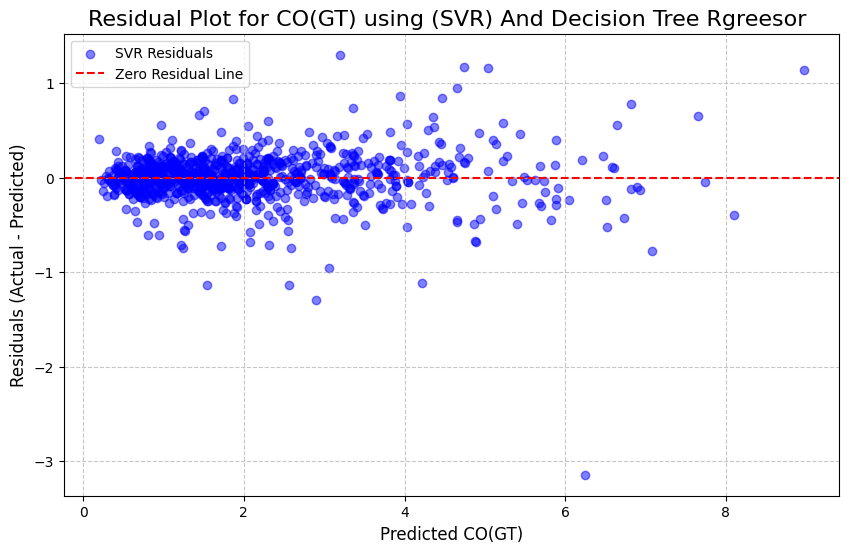

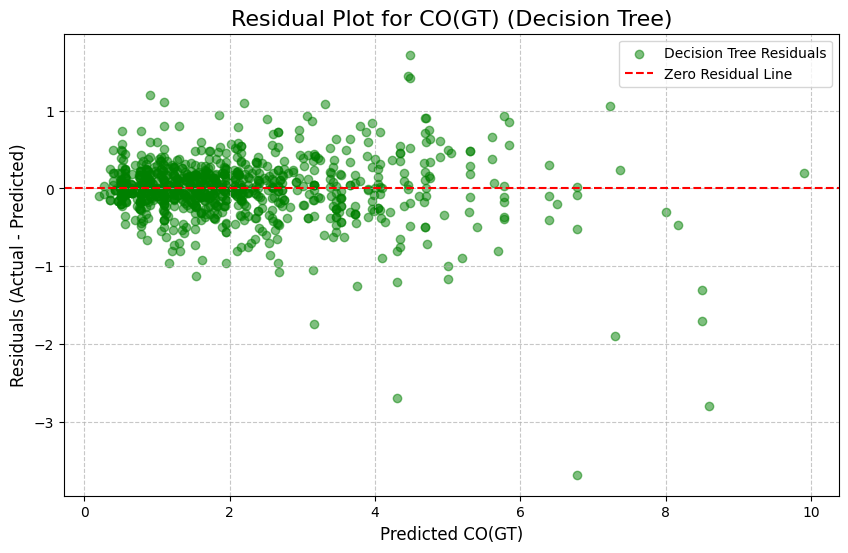

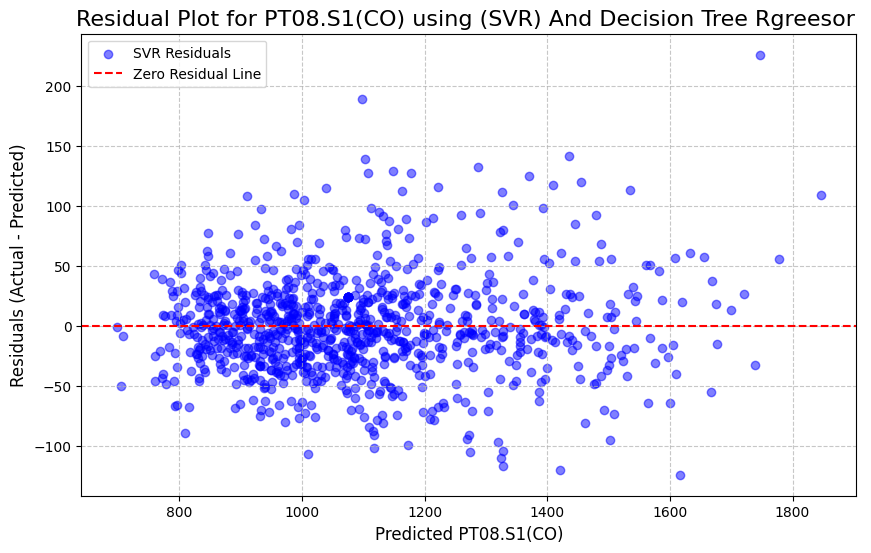

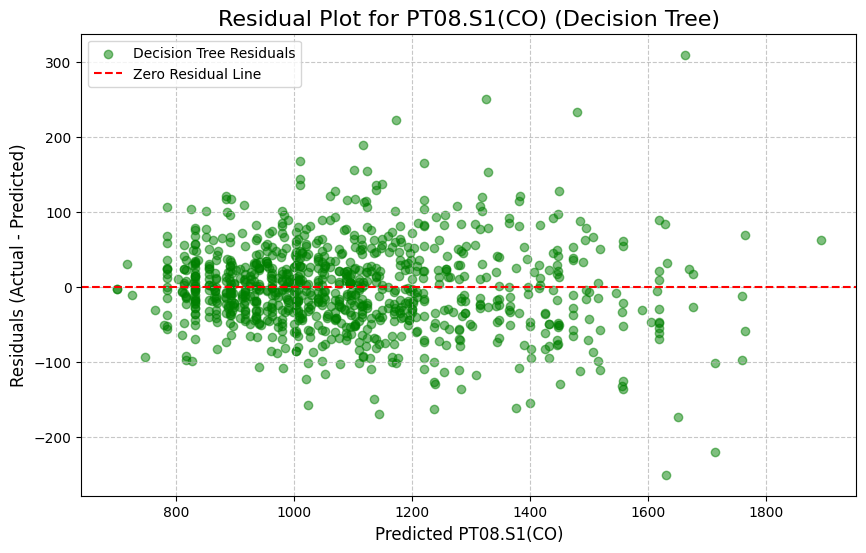

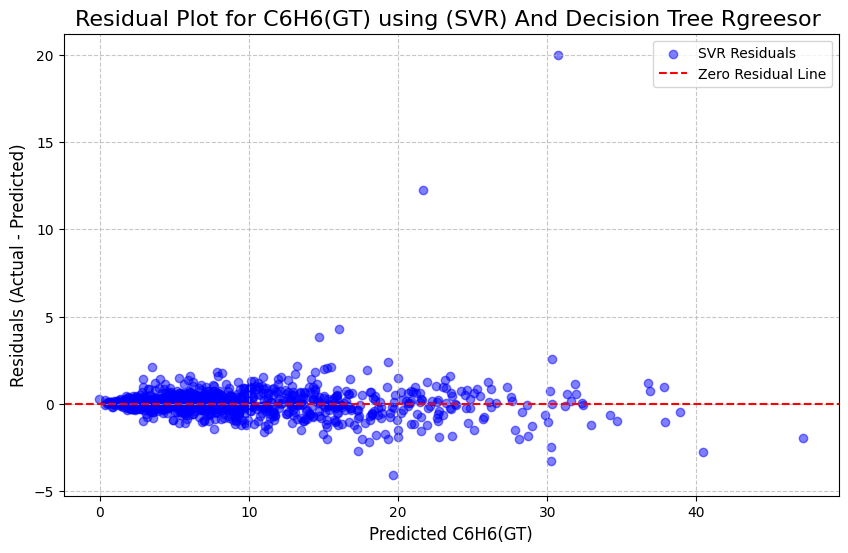

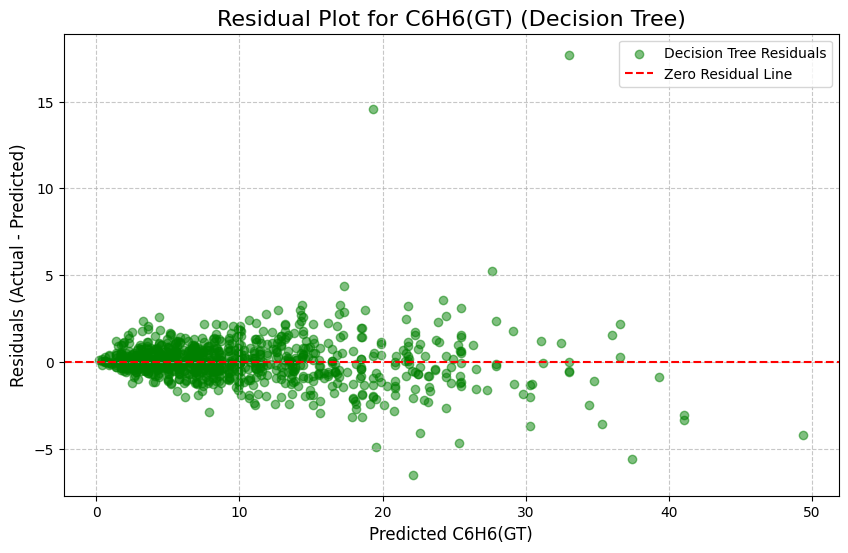

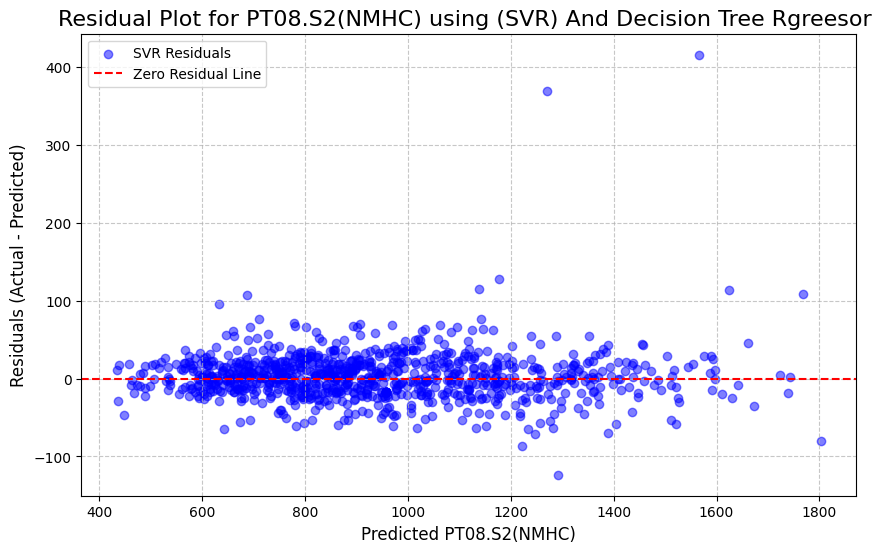

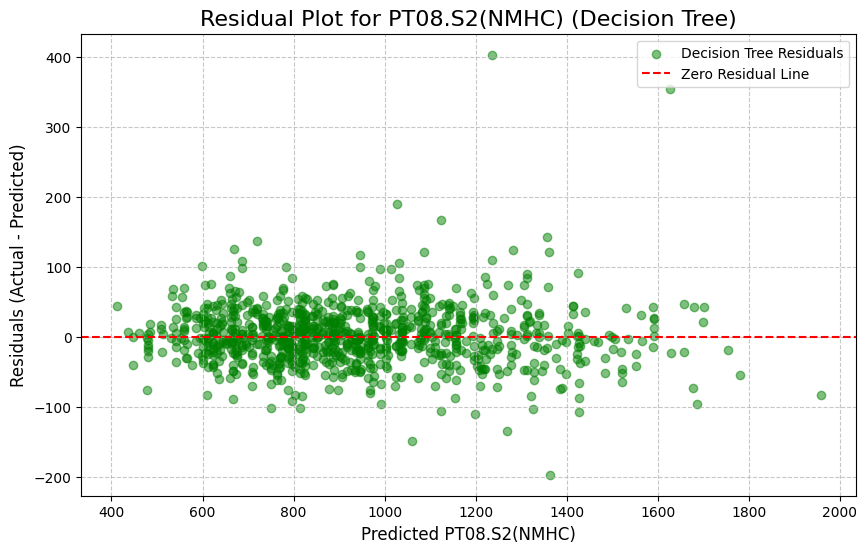

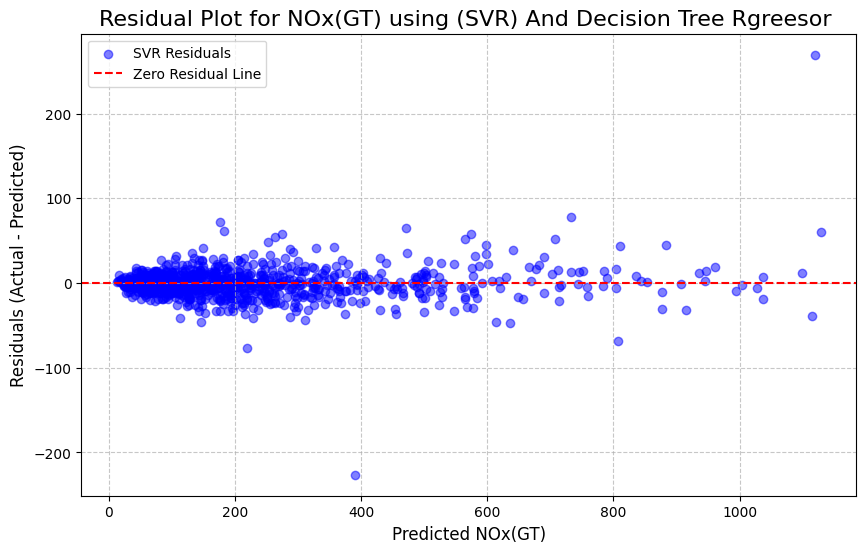

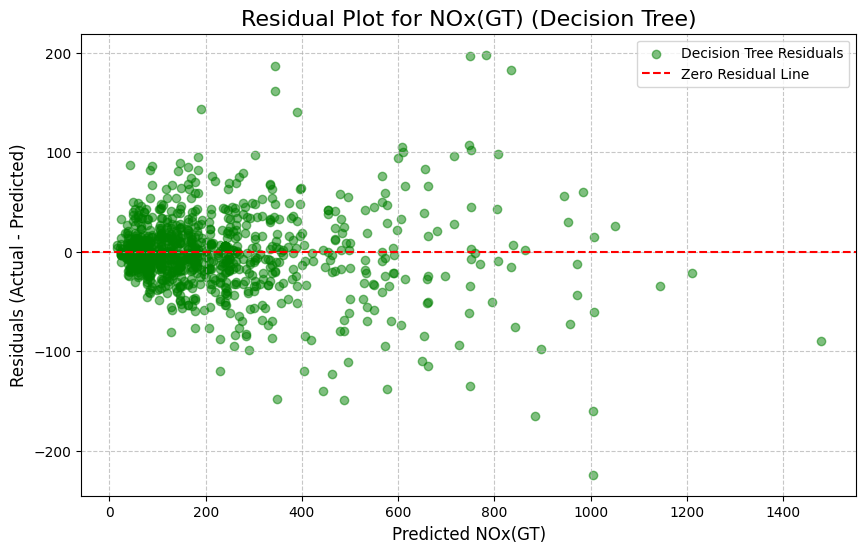

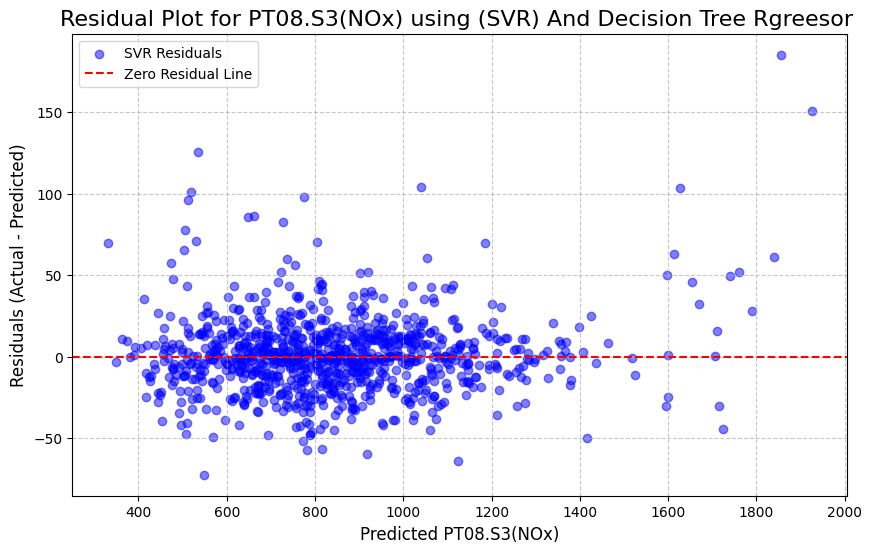

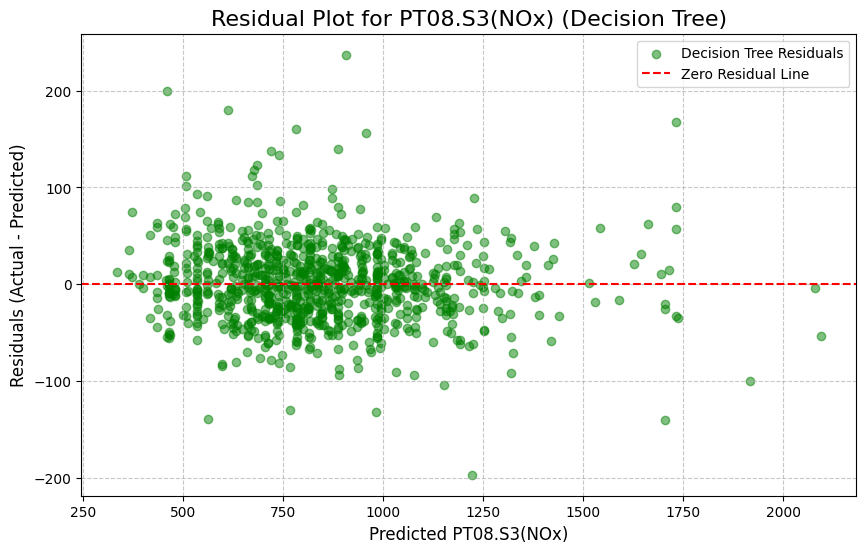

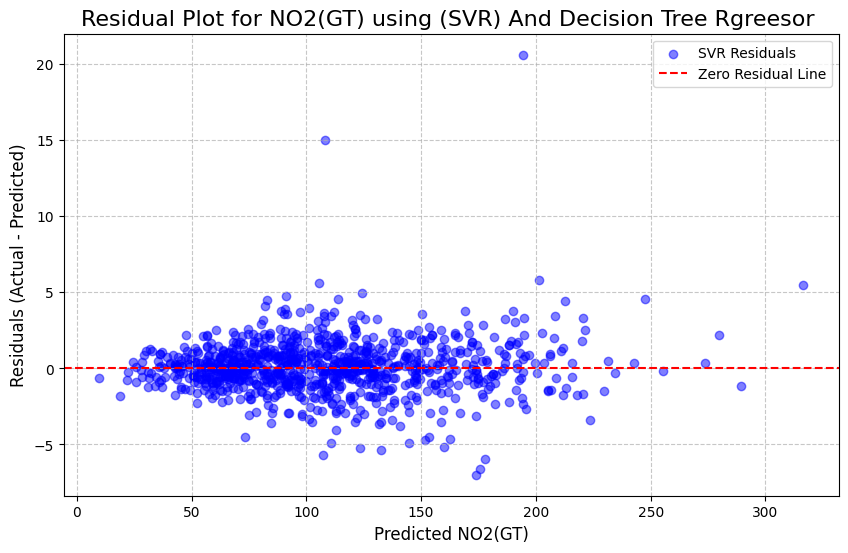

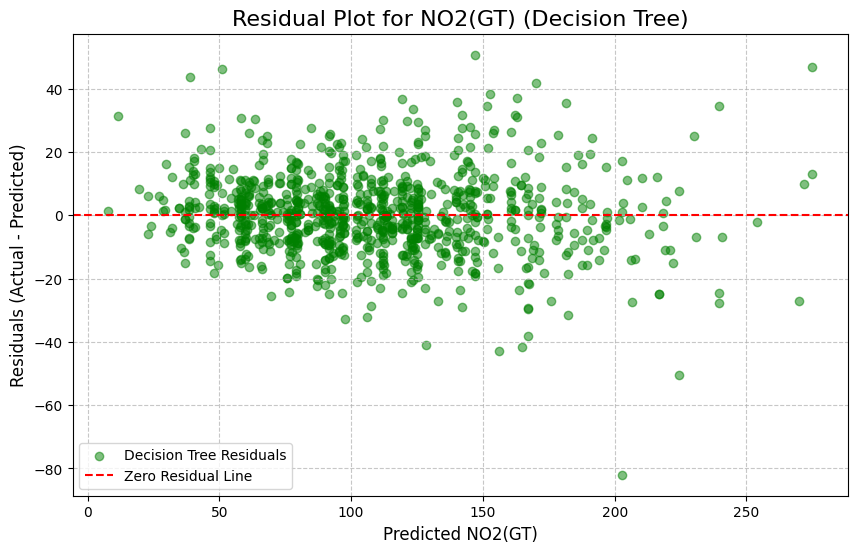

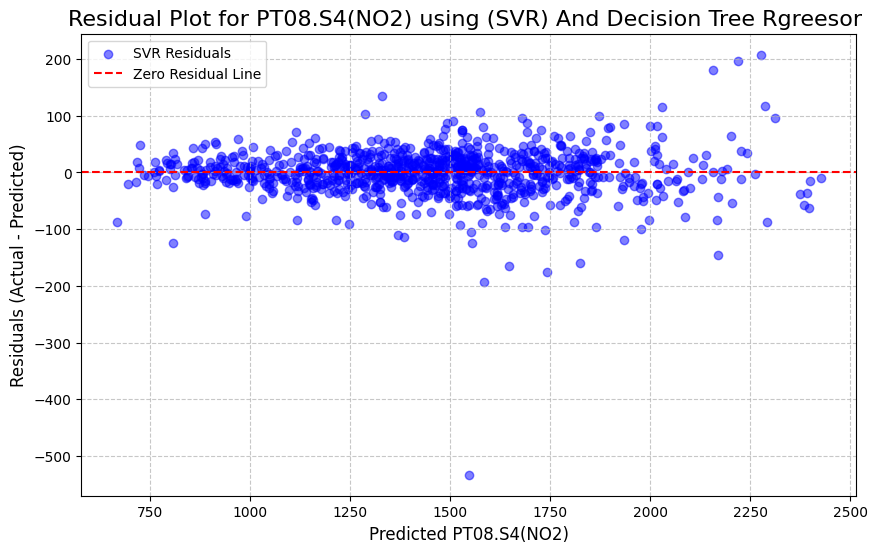

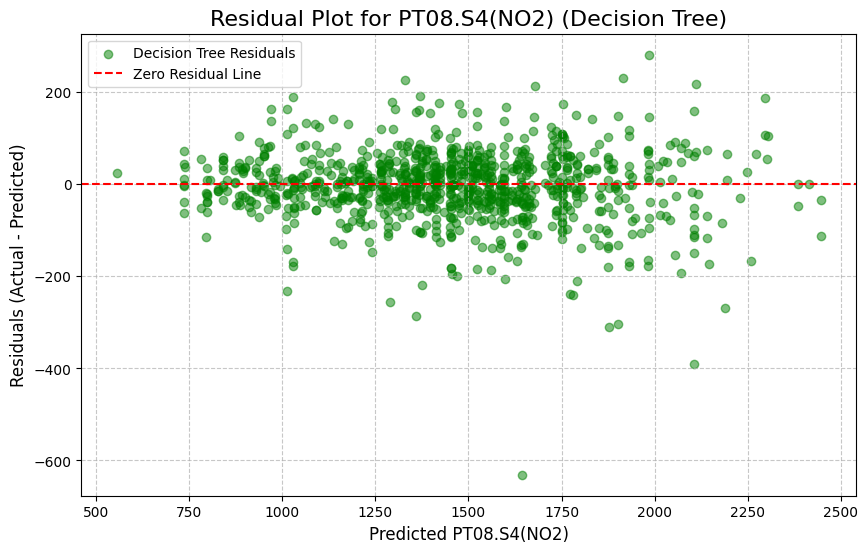

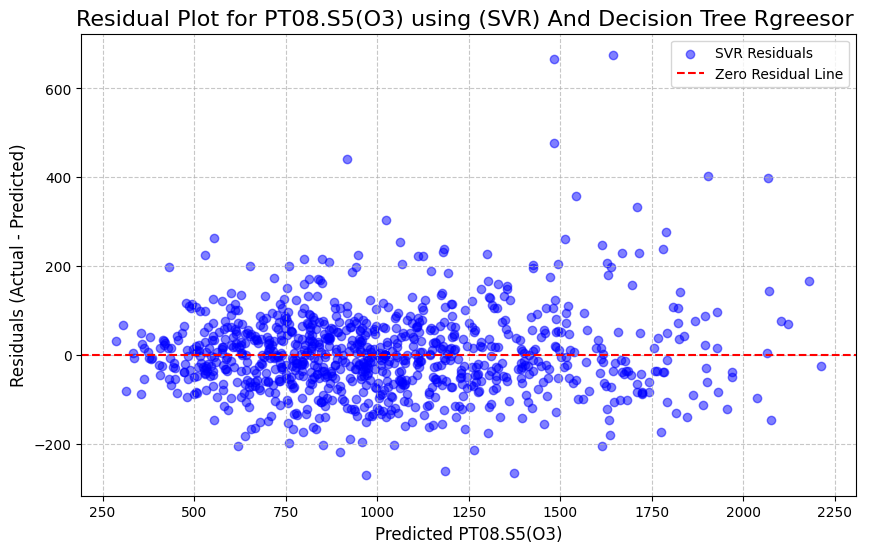

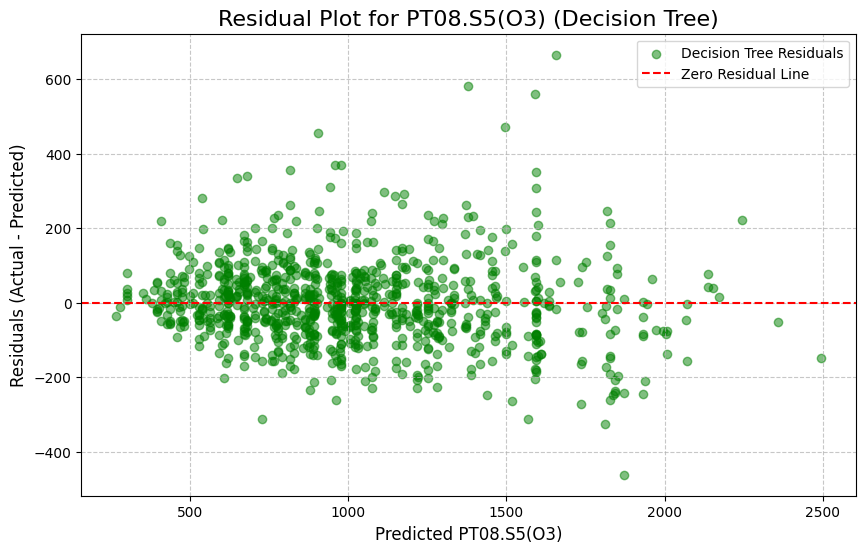

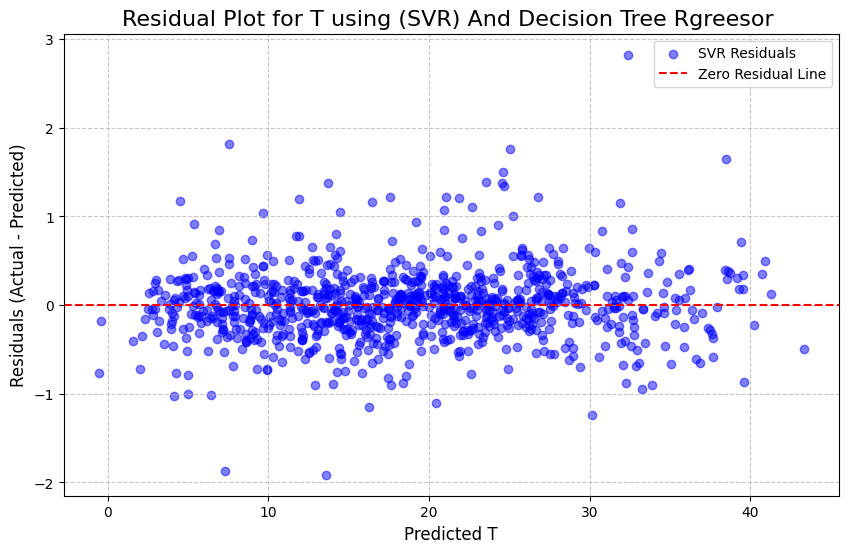

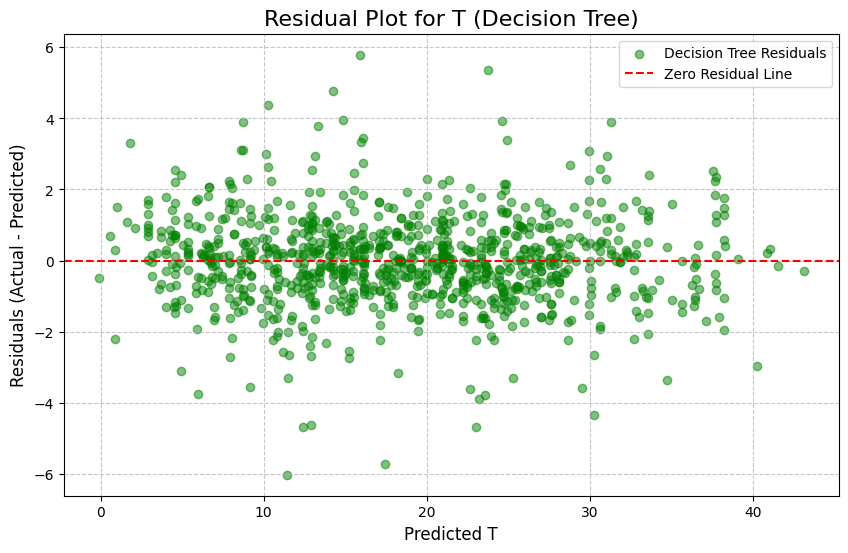

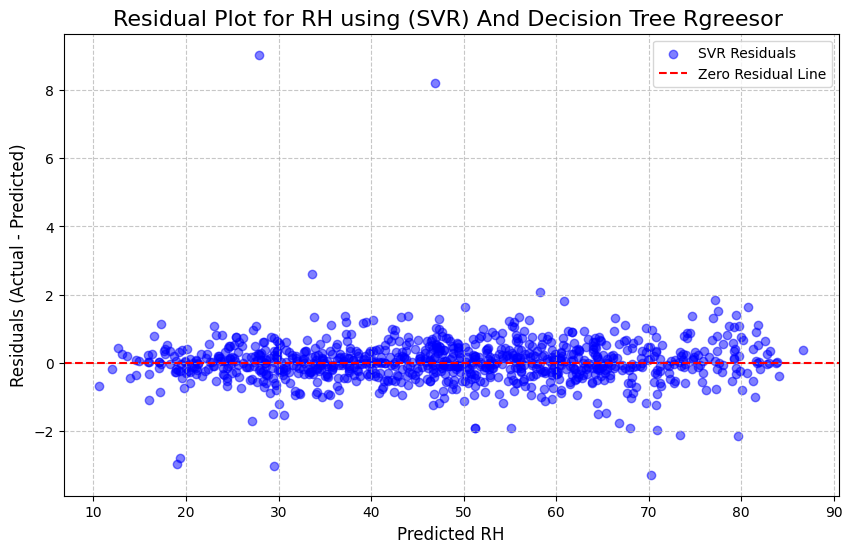

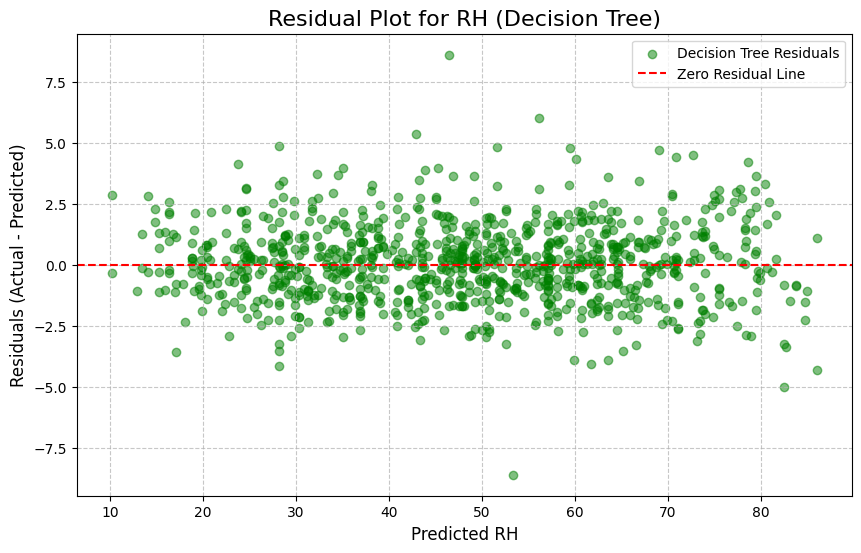

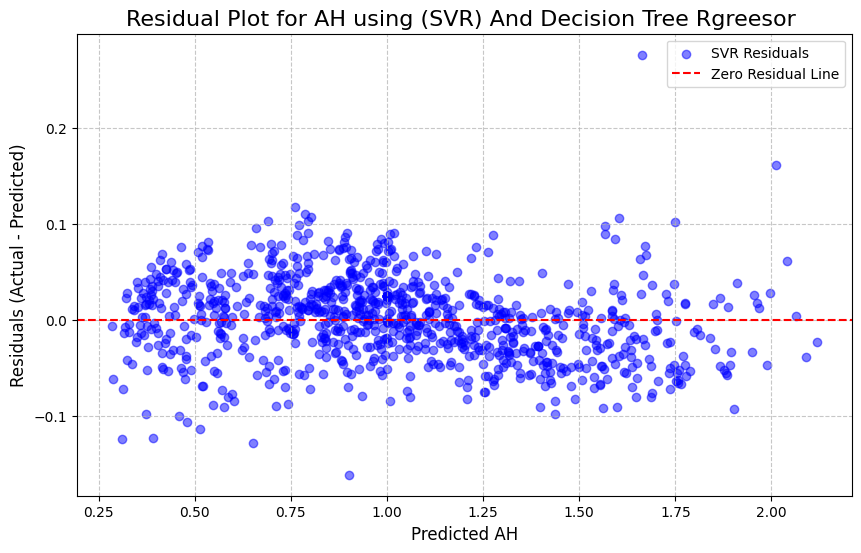

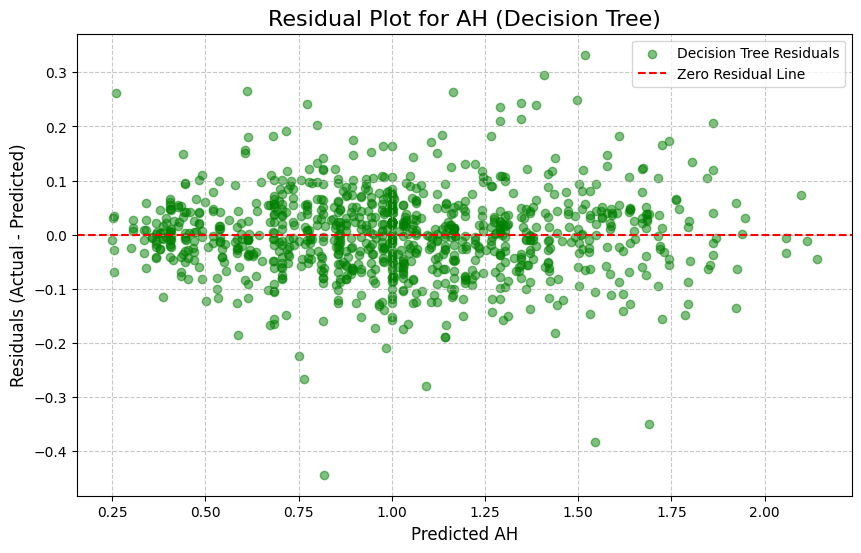

In [95]:
# Residual plots for SVR and Decision Tree models
for i, target in enumerate(y.columns):
    # Calculate residuals
    svr_residuals = y_test[target] - svr_predictions[:, i]
    dt_residuals = y_test[target] - dt_predictions[:, i]

    # Plot residuals for SVR
    plt.figure(figsize=(10, 6))
    plt.scatter(svr_predictions[:, i], svr_residuals, alpha=0.5, color='blue', label='SVR Residuals')
    plt.axhline(y=0, color='red', linestyle='--', label='Zero Residual Line')
    plt.xlabel(f'Predicted {target}', fontsize=12)
    plt.ylabel('Residuals (Actual - Predicted)', fontsize=12)
    plt.title(f'Residual Plot for {target} using (SVR) And Decision Tree Rgreesor ', fontsize=16)
    plt.legend()
    plt.grid(linestyle='--', alpha=0.7)
    plt.show()

    # Plot residuals for Decision Tree
    plt.figure(figsize=(10, 6))
    plt.scatter(dt_predictions[:, i], dt_residuals, alpha=0.5, color='green', label='Decision Tree Residuals')
    plt.axhline(y=0, color='red', linestyle='--', label='Zero Residual Line')
    plt.xlabel(f'Predicted {target}', fontsize=12)
    plt.ylabel('Residuals (Actual - Predicted)', fontsize=12)
    plt.title(f'Residual Plot for {target} (Decision Tree)', fontsize=16)
    plt.legend()
    plt.grid(linestyle='--', alpha=0.7)
    plt.show()

CO(GT) - Test MSE: 0.0938, Test RMSE: 0.3062, Test MAE: 0.1919
PT08.S1(CO) - Test MSE: 2003.3178, Test RMSE: 44.7584, Test MAE: 33.2124
C6H6(GT) - Test MSE: 1.2021, Test RMSE: 1.0964, Test MAE: 0.6176
PT08.S2(NMHC) - Test MSE: 1176.7627, Test RMSE: 34.3040, Test MAE: 23.2477
NOx(GT) - Test MSE: 787.1793, Test RMSE: 28.0567, Test MAE: 19.0664
PT08.S3(NOx) - Test MSE: 1132.8693, Test RMSE: 33.6581, Test MAE: 24.4054
NO2(GT) - Test MSE: 120.1343, Test RMSE: 10.9606, Test MAE: 8.1060
PT08.S4(NO2) - Test MSE: 2822.7953, Test RMSE: 53.1300, Test MAE: 37.3895
PT08.S5(O3) - Test MSE: 8708.4560, Test RMSE: 93.3191, Test MAE: 69.8124
T - Test MSE: 0.4172, Test RMSE: 0.6459, Test MAE: 0.4888
RH - Test MSE: 1.4390, Test RMSE: 1.1996, Test MAE: 0.9048
AH - Test MSE: 0.0016, Test RMSE: 0.0400, Test MAE: 0.0300


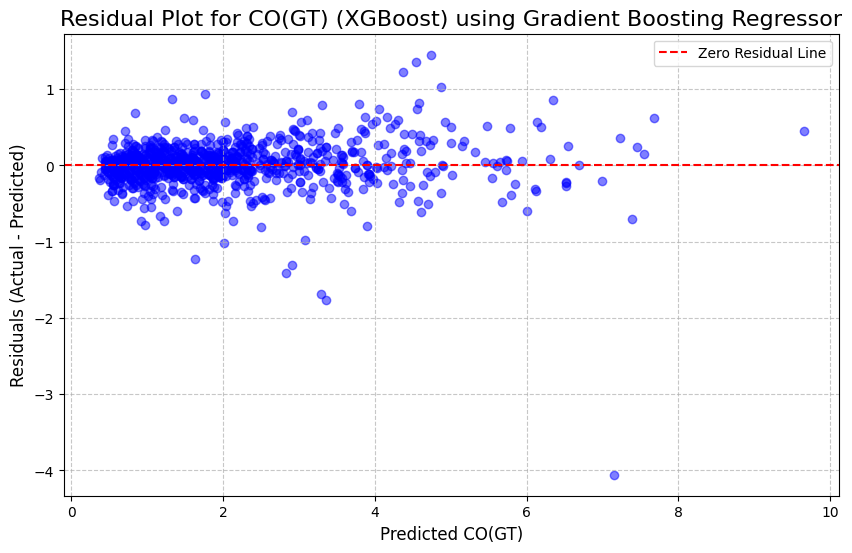

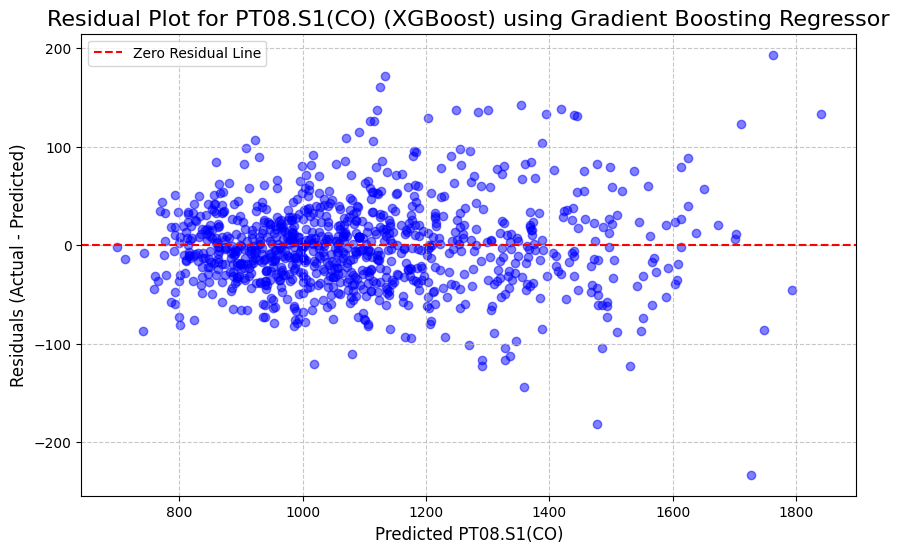

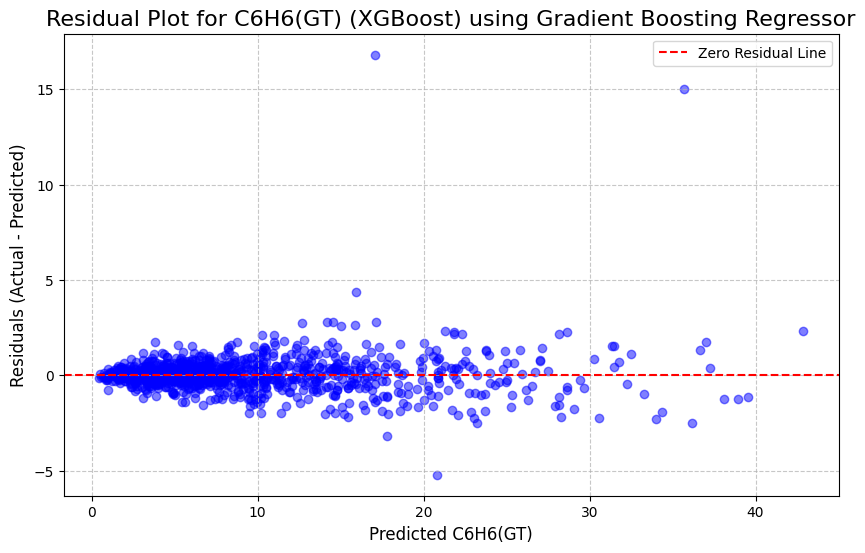

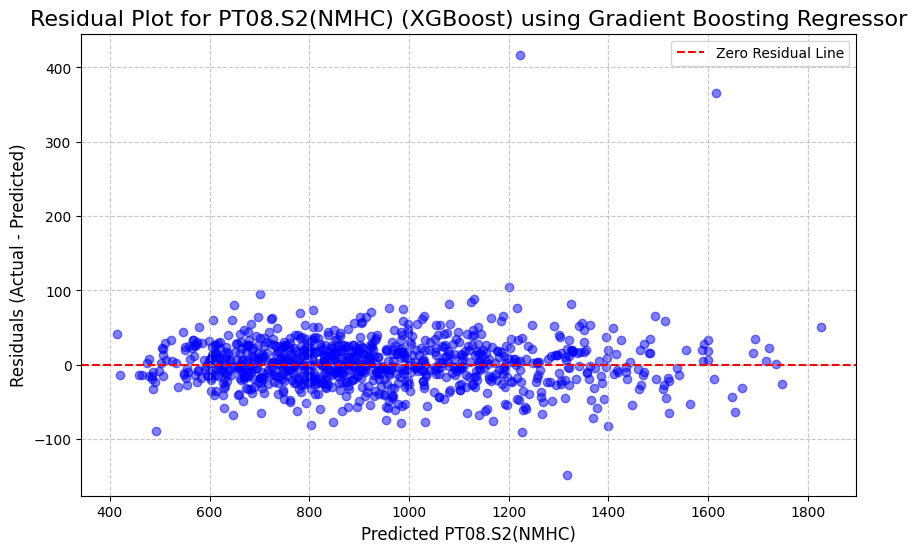

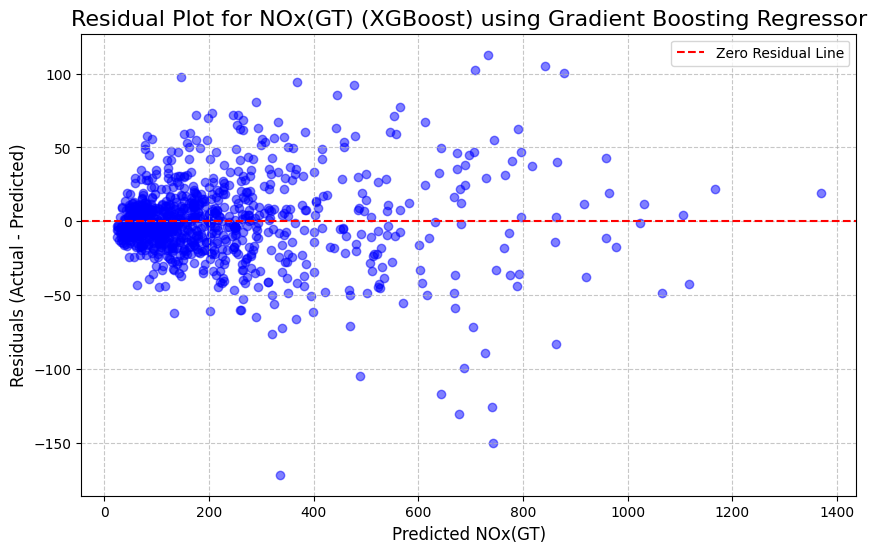

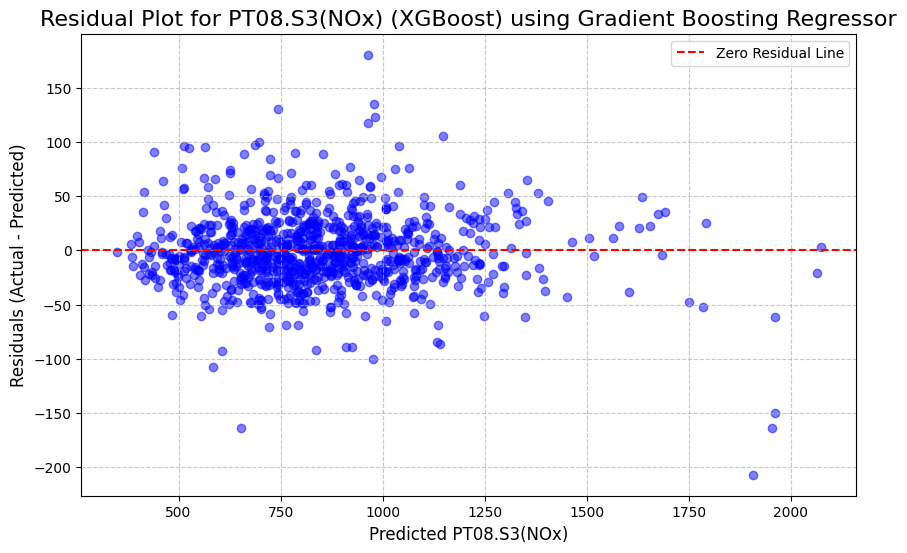

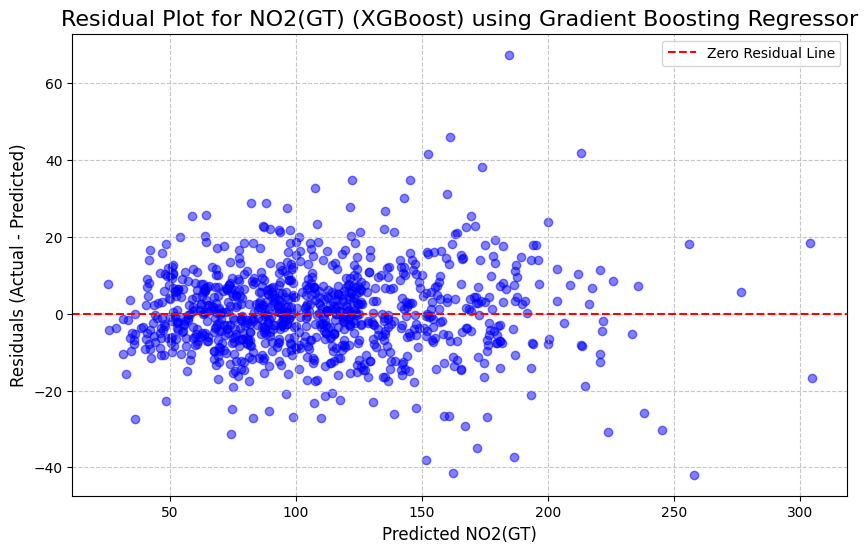

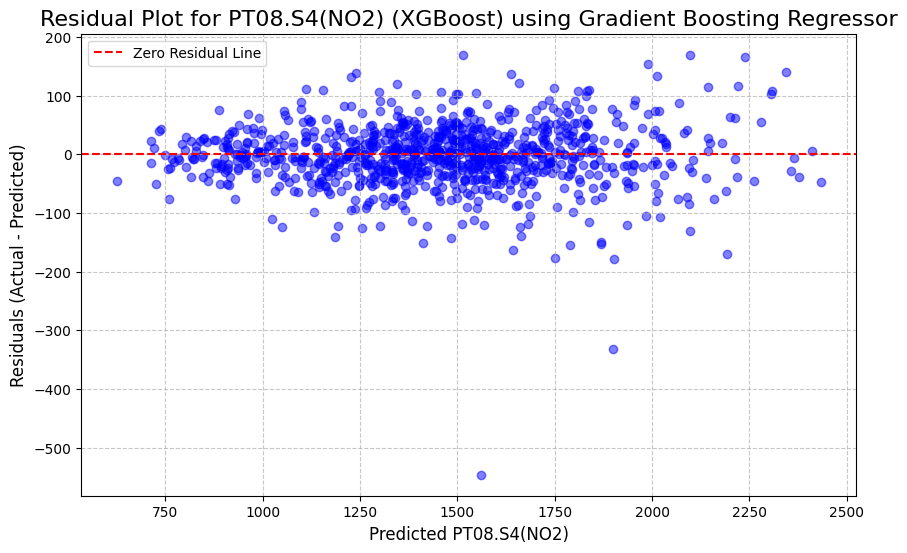

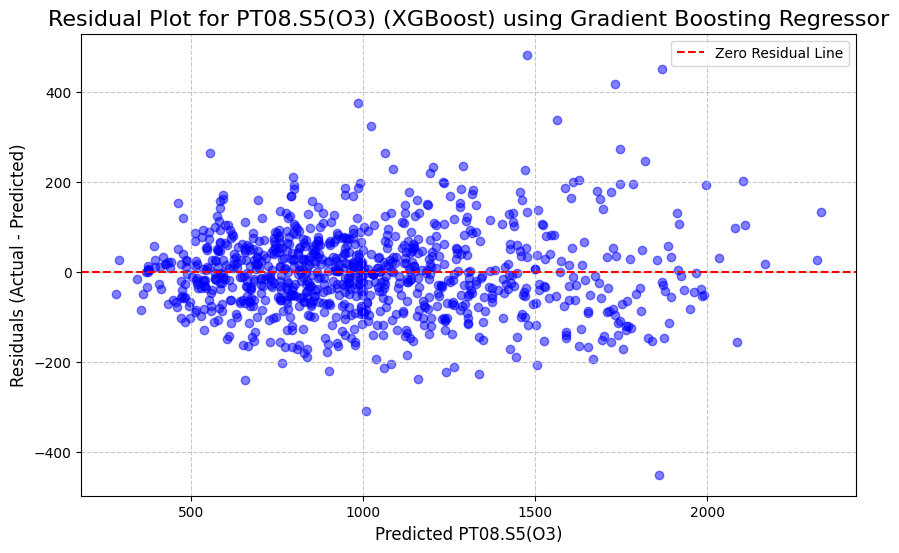

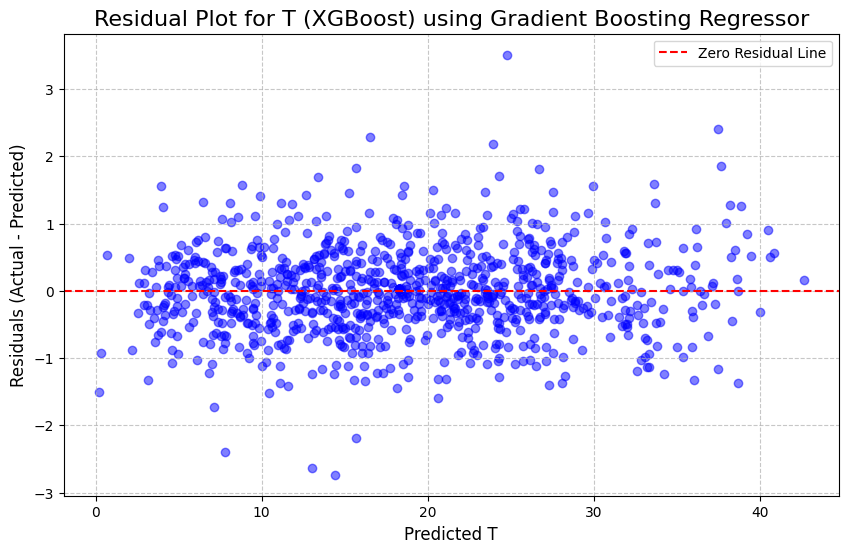

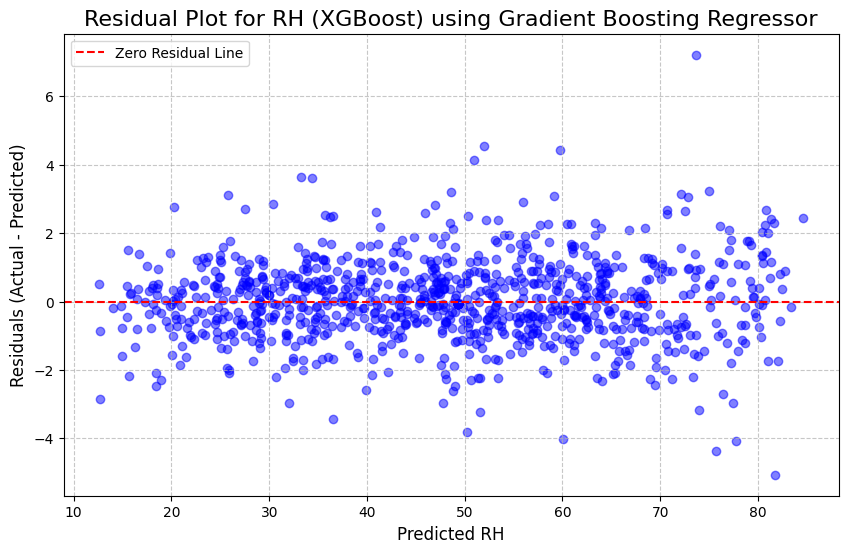

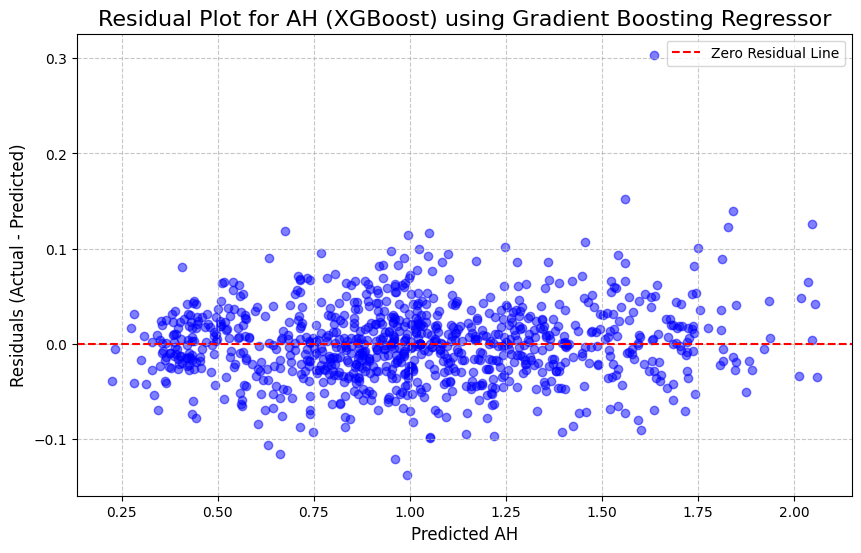

In [103]:
from xgboost import XGBRegressor
# Use the first 5 principal components as input features
input_features = pca_data[:, :5]

# Select the target variables
target_variables = numerical_data[['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 
                                   'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 
                                   'PT08.S5(O3)', 'T', 'RH', 'AH']]

# Split the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(input_features, target_variables, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize the Gradient Boosting Regressor (XGBoost)
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# Train the model for each target variable separately
xgb_predictions = []
for col in target_variables.columns:
    xgb_model.fit(X_train, y_train[col])
    xgb_pred = xgb_model.predict(X_test)
    xgb_predictions.append(xgb_pred)

# Convert predictions to a NumPy array
xgb_predictions = np.array(xgb_predictions).T

# Calculate evaluation metrics for each target variable
test_mse = mean_squared_error(y_test, xgb_predictions, multioutput='raw_values')
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, xgb_predictions, multioutput='raw_values')

# Print evaluation metrics for each target variable
for i, target in enumerate(target_variables.columns):
    print(
        f"{target} - "
        f"Test MSE: {test_mse[i]:.4f}, "
        f"Test RMSE: {test_rmse[i]:.4f}, "
        f"Test MAE: {test_mae[i]:.4f}"
    )

# Residual plots for each target variable
for i, target in enumerate(target_variables.columns):
    residuals = y_test.iloc[:, i] - xgb_predictions[:, i]  # Residuals for the target variable

    plt.figure(figsize=(10, 6))
    plt.scatter(xgb_predictions[:, i], residuals, alpha=0.5, color='blue')
    plt.axhline(y=0, color='red', linestyle='--', label='Zero Residual Line')
    plt.xlabel(f'Predicted {target}', fontsize=12)
    plt.ylabel('Residuals (Actual - Predicted)', fontsize=12)
    plt.title(f'Residual Plot for {target} (XGBoost) using Gradient Boosting Regressor', fontsize=16)
    plt.legend()
    plt.grid(linestyle='--', alpha=0.7)
    plt.show()

CO(GT) - Test MSE: 0.0941, Test RMSE: 0.3068, Test MAE: 0.1968
PT08.S1(CO) - Test MSE: 1889.6662, Test RMSE: 43.4703, Test MAE: 33.1448
C6H6(GT) - Test MSE: 1.1889, Test RMSE: 1.0904, Test MAE: 0.6145
PT08.S2(NMHC) - Test MSE: 1150.2896, Test RMSE: 33.9159, Test MAE: 23.1003
NOx(GT) - Test MSE: 720.6676, Test RMSE: 26.8453, Test MAE: 18.2440
PT08.S3(NOx) - Test MSE: 912.7656, Test RMSE: 30.2120, Test MAE: 21.7020
NO2(GT) - Test MSE: 58.2289, Test RMSE: 7.6308, Test MAE: 5.7744
PT08.S4(NO2) - Test MSE: 3225.2319, Test RMSE: 56.7911, Test MAE: 39.0277
PT08.S5(O3) - Test MSE: 8771.6430, Test RMSE: 93.6571, Test MAE: 69.4374
T - Test MSE: 0.6486, Test RMSE: 0.8053, Test MAE: 0.6011
RH - Test MSE: 1.1950, Test RMSE: 1.0932, Test MAE: 0.8531
AH - Test MSE: 0.0023, Test RMSE: 0.0483, Test MAE: 0.0361


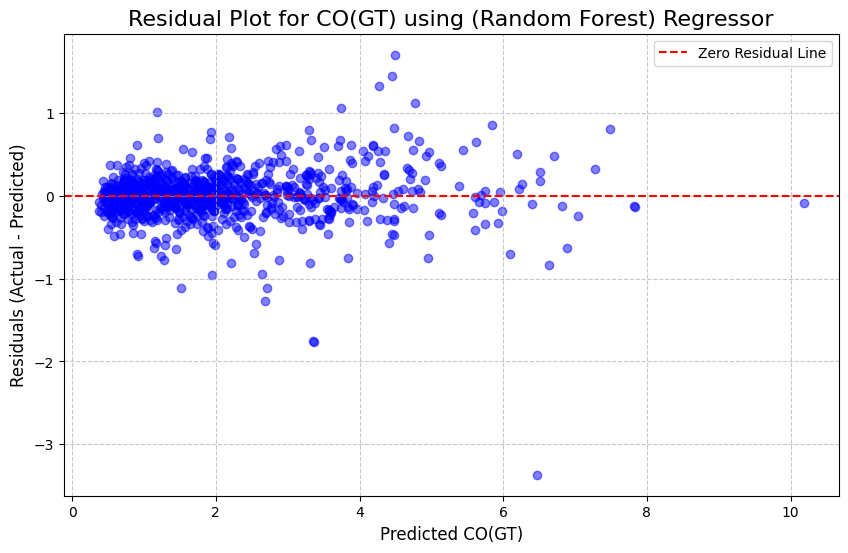

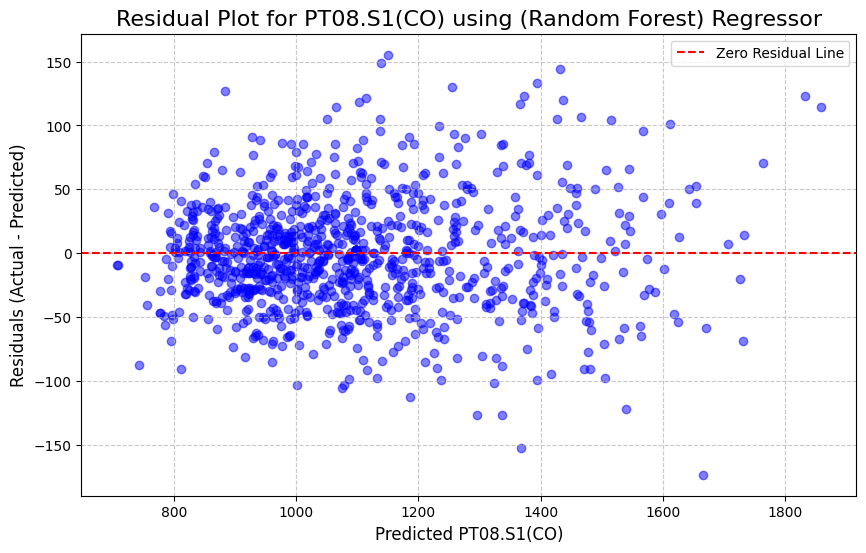

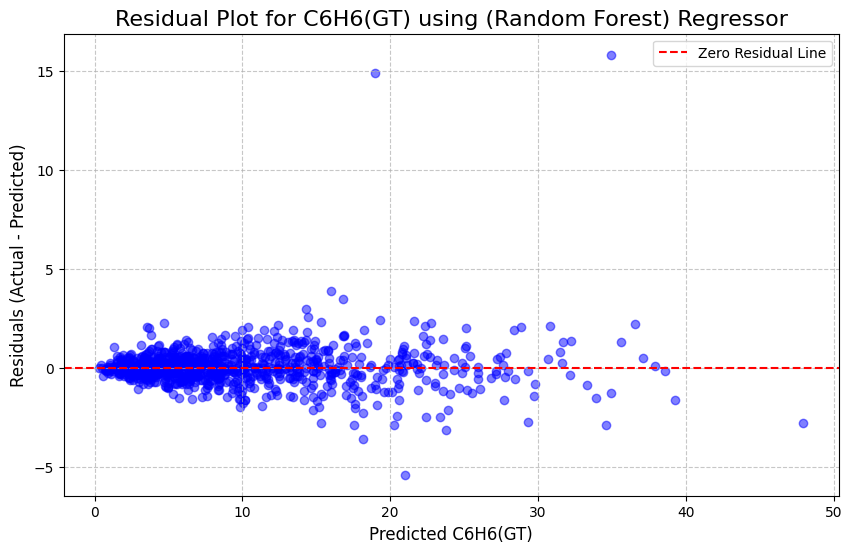

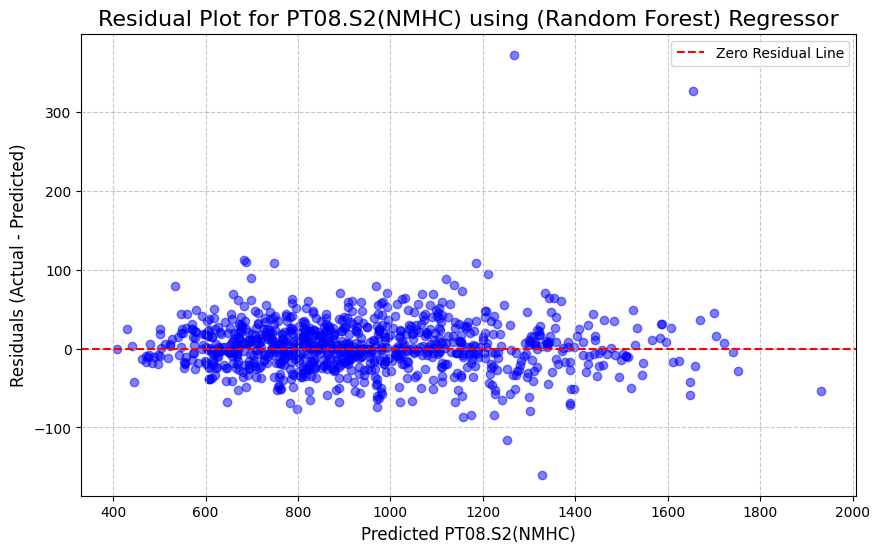

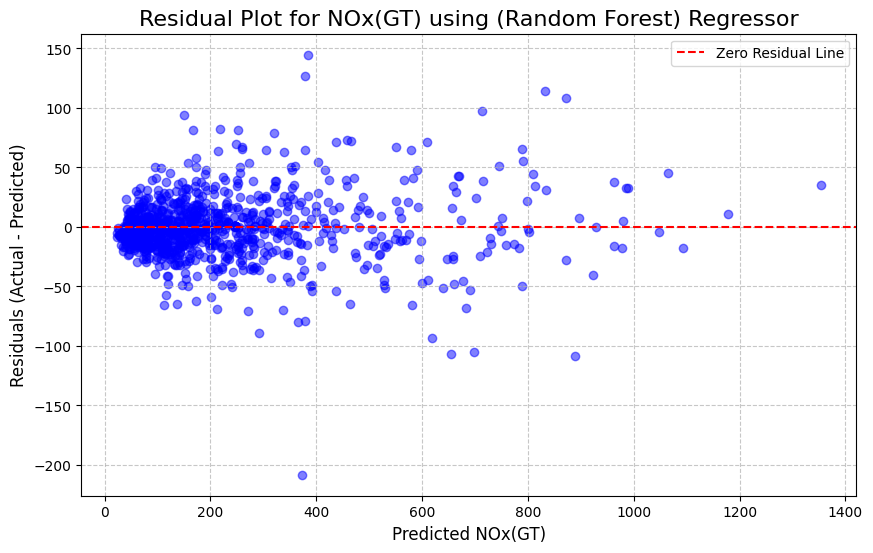

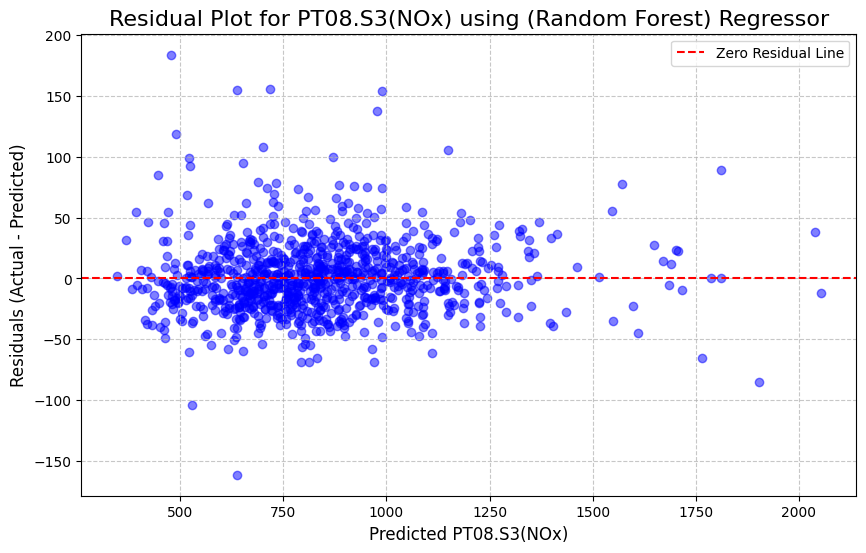

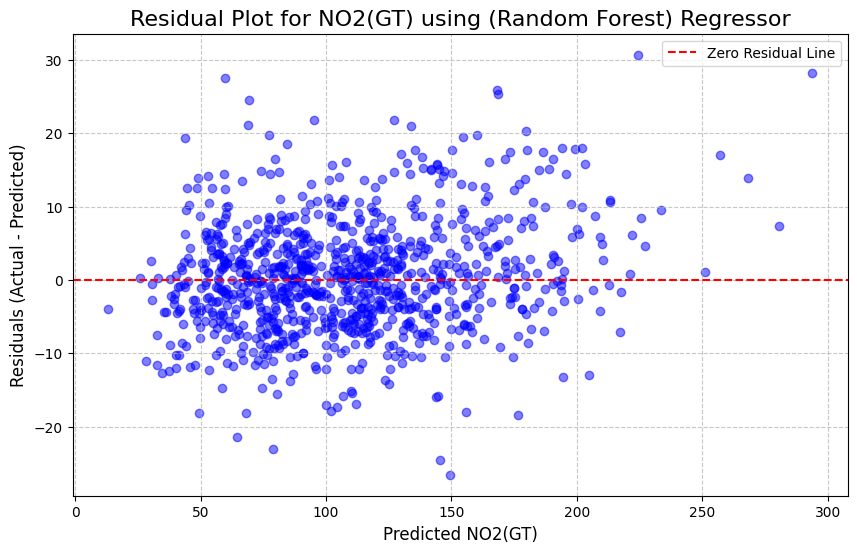

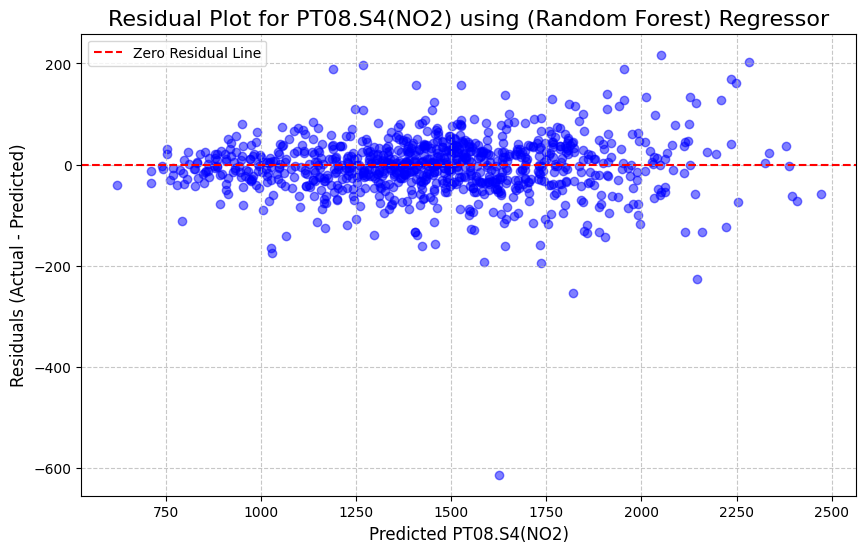

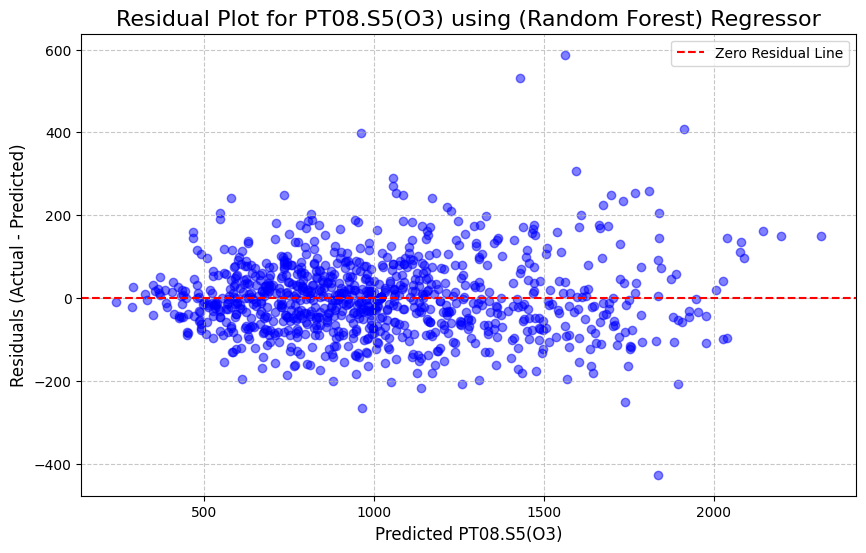

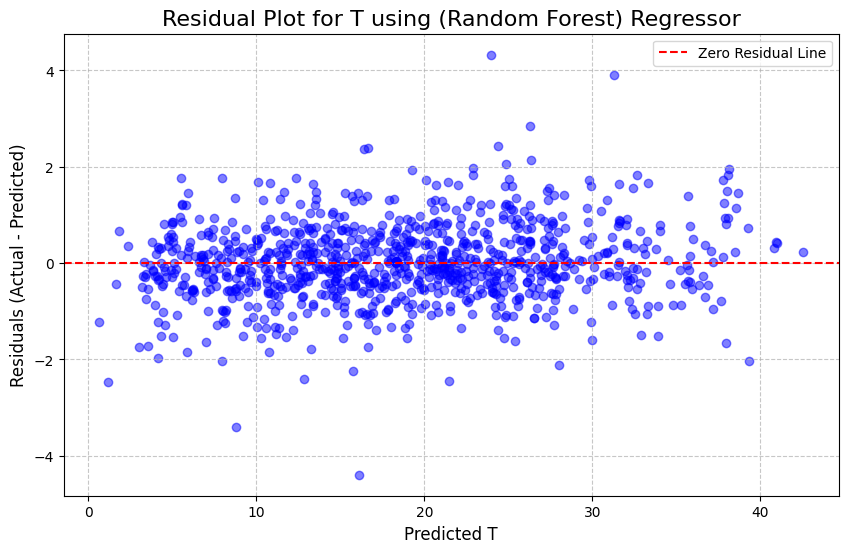

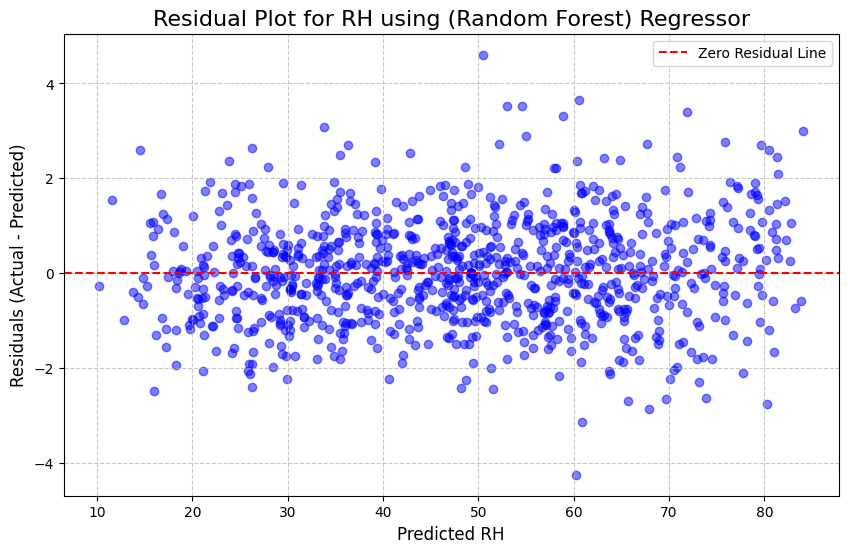

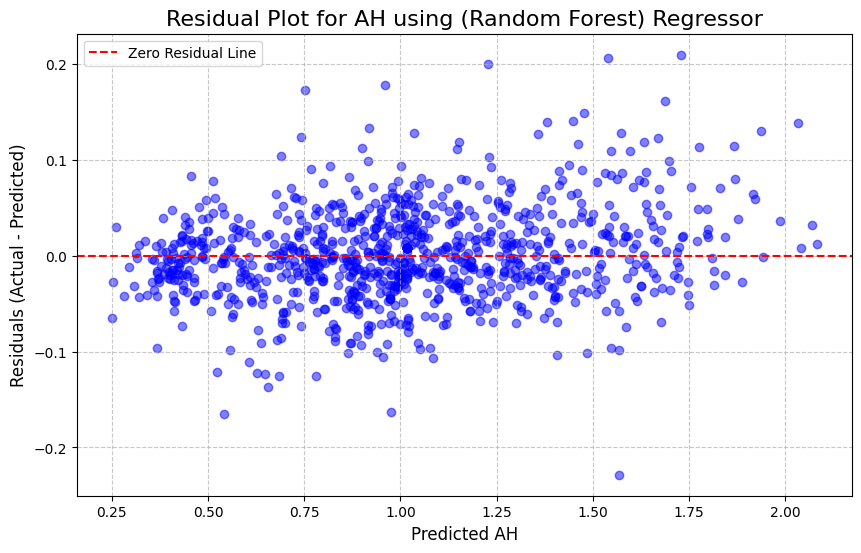

In [105]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Use the first 6 principal components as input features
input_features = pca_data[:, :6]

# Select the target variables
target_variables = numerical_data[['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 
                                   'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 
                                   'PT08.S5(O3)', 'T', 'RH', 'AH']]

# Split the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(input_features, target_variables, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Train the model for each target variable separately
rf_predictions = []
for col in target_variables.columns:
    rf_model.fit(X_train, y_train[col])
    rf_pred = rf_model.predict(X_test)
    rf_predictions.append(rf_pred)

# Convert predictions to a NumPy array
rf_predictions = np.array(rf_predictions).T

# Calculate evaluation metrics for each target variable
test_mse = mean_squared_error(y_test, rf_predictions, multioutput='raw_values')
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, rf_predictions, multioutput='raw_values')

# Print evaluation metrics for each target variable
for i, target in enumerate(target_variables.columns):
    print(
        f"{target} - "
        f"Test MSE: {test_mse[i]:.4f}, "
        f"Test RMSE: {test_rmse[i]:.4f}, "
        f"Test MAE: {test_mae[i]:.4f}"
    )

# Residual plots for each target variable
for i, target in enumerate(target_variables.columns):
    residuals = y_test.iloc[:, i] - rf_predictions[:, i]  # Residuals for the target variable

    plt.figure(figsize=(10, 6))
    plt.scatter(rf_predictions[:, i], residuals, alpha=0.5, color='blue')
    plt.axhline(y=0, color='red', linestyle='--', label='Zero Residual Line')
    plt.xlabel(f'Predicted {target}', fontsize=12)
    plt.ylabel('Residuals (Actual - Predicted)', fontsize=12)
    plt.title(f'Residual Plot for {target} using (Random Forest) Regressor', fontsize=16)
    plt.legend()
    plt.grid(linestyle='--', alpha=0.7)
    plt.show()